### Cargamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 

## Cargamos los datos

In [2]:
url_nuevos   = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto13/CasosNuevosCumulativo_T.csv"
data_nuevos  = pd.read_csv(url_nuevos)
data_nuevos = data_nuevos.rename(columns = {'Region':'Fecha'})
data_nuevos.tail(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
115,2020-06-26,37.0,135.0,227.0,50.0,69.0,315.0,2616.0,268.0,181.0,41.0,256.0,41.0,11.0,36.0,1.0,12.0,4296.0
116,2020-06-27,63.0,59.0,285.0,38.0,75.0,257.0,2957.0,186.0,169.0,43.0,181.0,23.0,7.0,32.0,5.0,26.0,4406.0
117,2020-06-28,38.0,122.0,281.0,31.0,76.0,253.0,2569.0,284.0,140.0,46.0,259.0,44.0,19.0,36.0,6.0,12.0,4216.0
118,2020-06-29,36.0,81.0,317.0,50.0,104.0,234.0,2508.0,238.0,141.0,21.0,197.0,40.0,11.0,33.0,1.0,5.0,4017.0
119,2020-06-30,28.0,75.0,204.0,37.0,89.0,211.0,2255.0,237.0,86.0,13.0,102.0,19.0,12.0,14.0,0.0,12.0,3394.0


In [3]:
url_acumulados  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_acumulados = pd.read_csv(url_acumulados)
data_acumulados = data_acumulados.rename(columns = {'Region':'Fecha'})
data_acumulados.tail(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
115,2020-06-26,1549.0,5712.0,7742.0,887.0,2705.0,10797.0,208862.0,5136.0,5013.0,2274.0,5958.0,3105.0,652.0,1541.0,30.0,1397.0,263360.0
116,2020-06-27,1611.0,5771.0,8027.0,925.0,2781.0,11054.0,211819.0,5322.0,5182.0,2317.0,6139.0,3128.0,659.0,1573.0,35.0,1423.0,267766.0
117,2020-06-28,1649.0,5893.0,8308.0,956.0,2857.0,11307.0,214388.0,5606.0,5322.0,2363.0,6398.0,3172.0,678.0,1609.0,41.0,1435.0,271982.0
118,2020-06-29,1685.0,5974.0,8625.0,1006.0,2961.0,11541.0,216896.0,5844.0,5463.0,2384.0,6595.0,3212.0,689.0,1642.0,42.0,1440.0,275999.0
119,2020-06-30,1713.0,6049.0,8829.0,1043.0,3050.0,11752.0,219151.0,6081.0,5549.0,2397.0,6697.0,3231.0,701.0,1656.0,42.0,1452.0,279393.0


## Nuevos contagios por día vs contagios totales

In [4]:
def graph(region):
    fechas        = data_nuevos["Fecha"].values.tolist()
    casos_nuevos  = data_nuevos[region].values.tolist()
    casos_totales = data_acumulados[region].values.tolist()
    
    plt.figure(figsize=(20,15))
    plt.plot(casos_totales, casos_nuevos, 'bo-')
    plt.title("Region: " + region)
    plt.grid()
    plt.xlabel('Casos totales')
    plt.ylabel('Casos nuevos')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

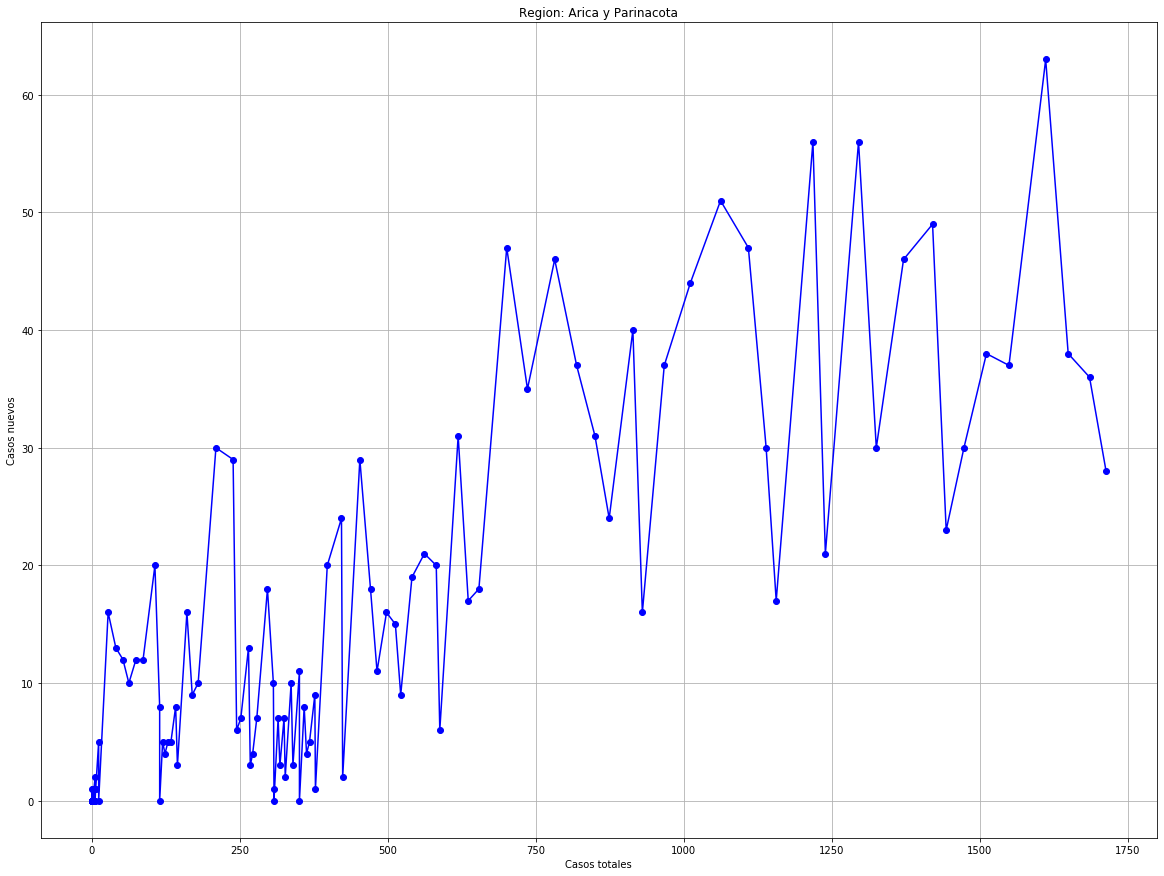

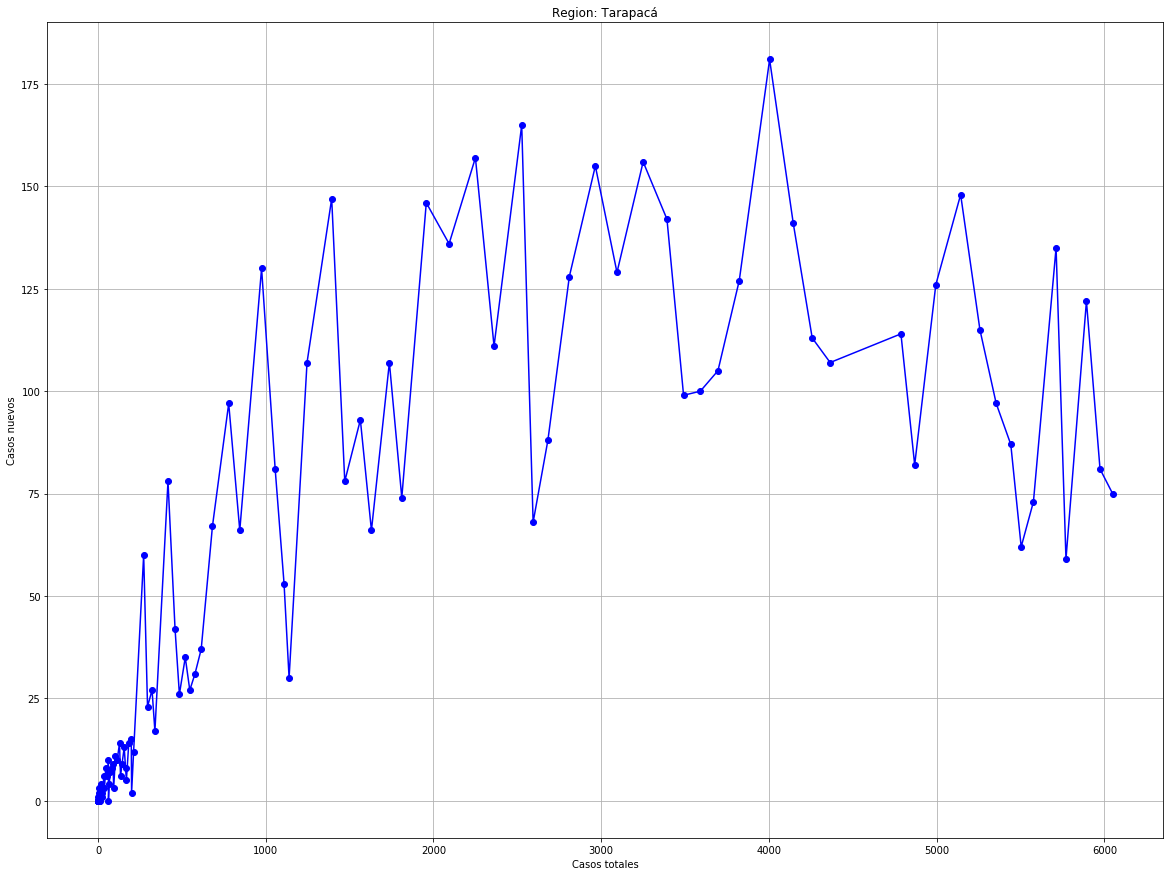

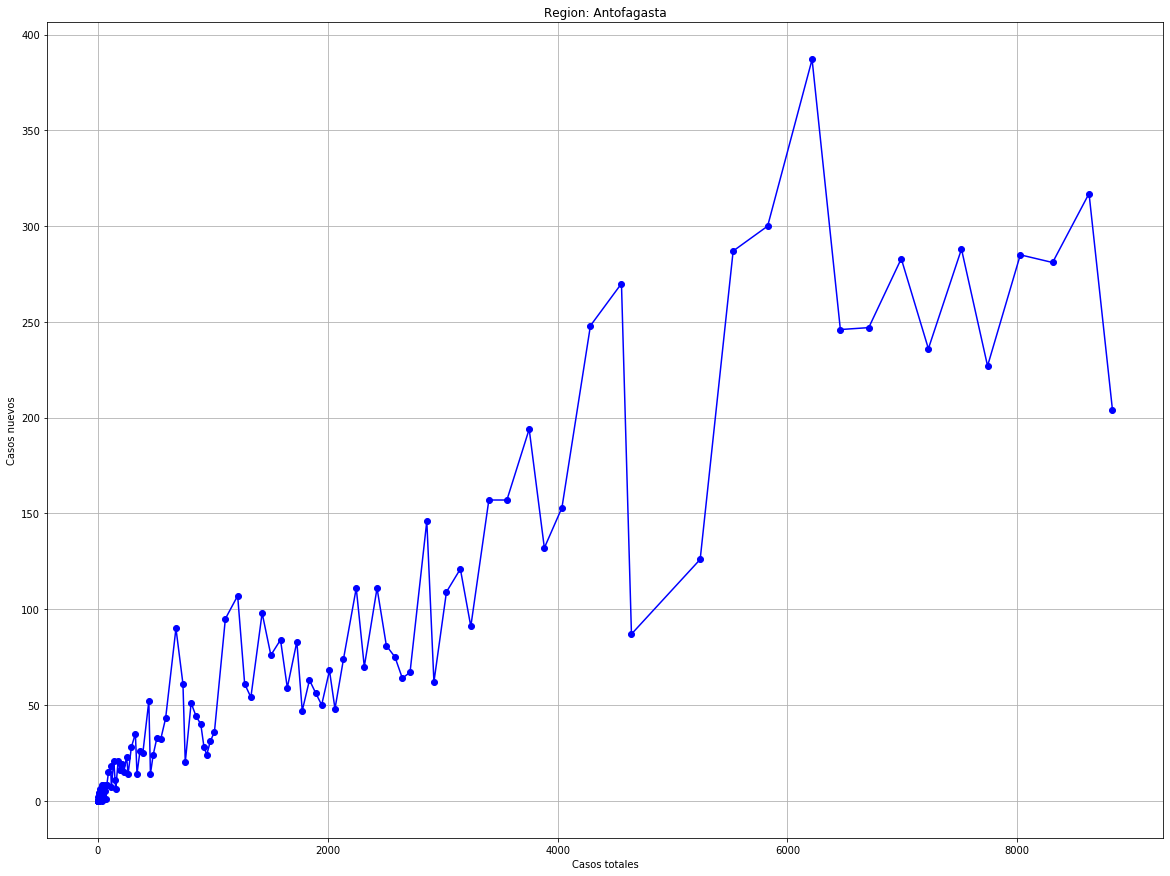

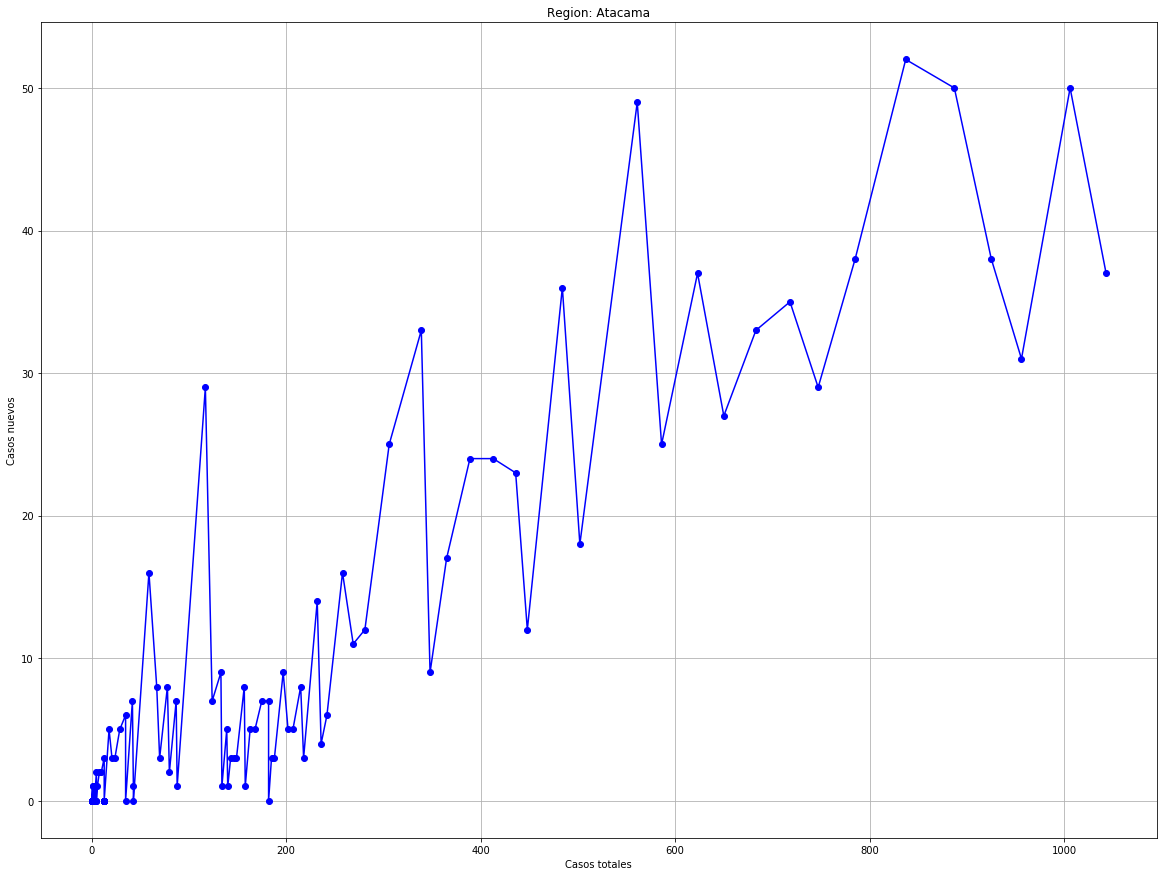

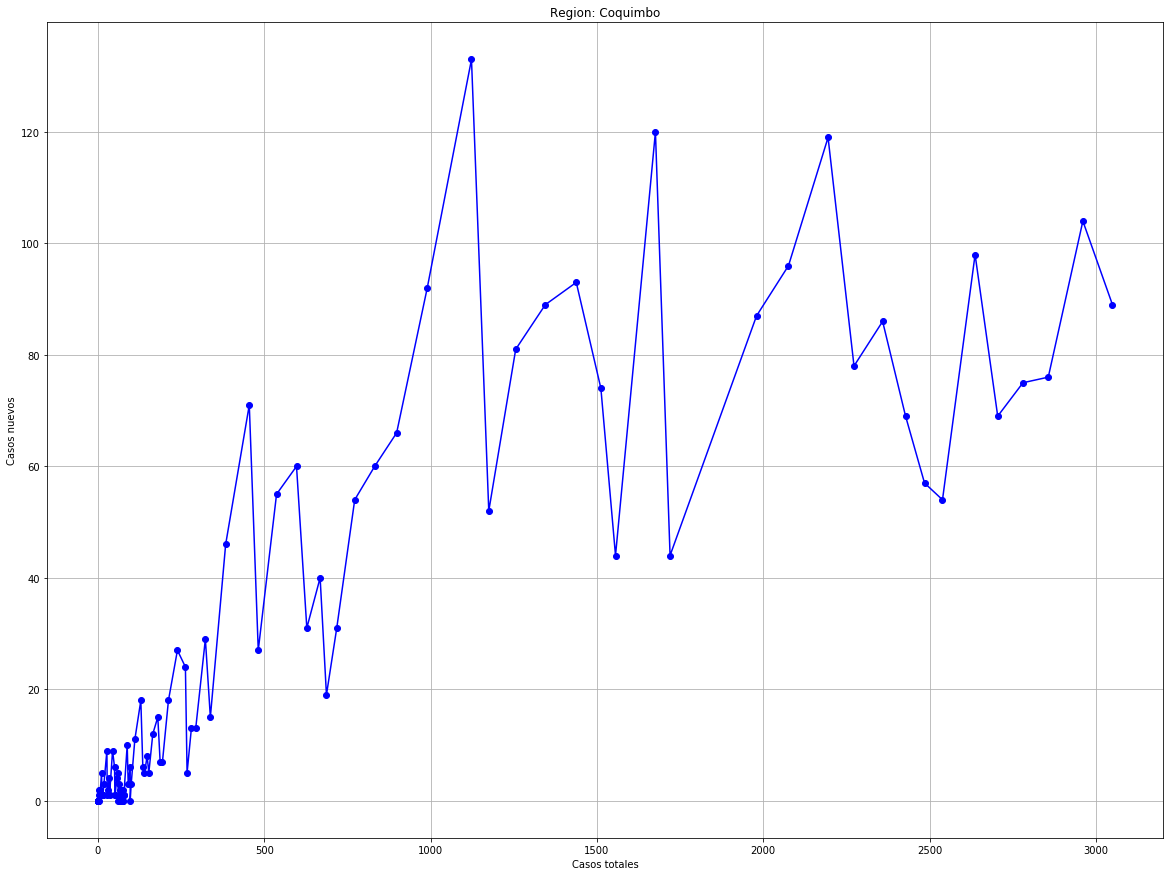

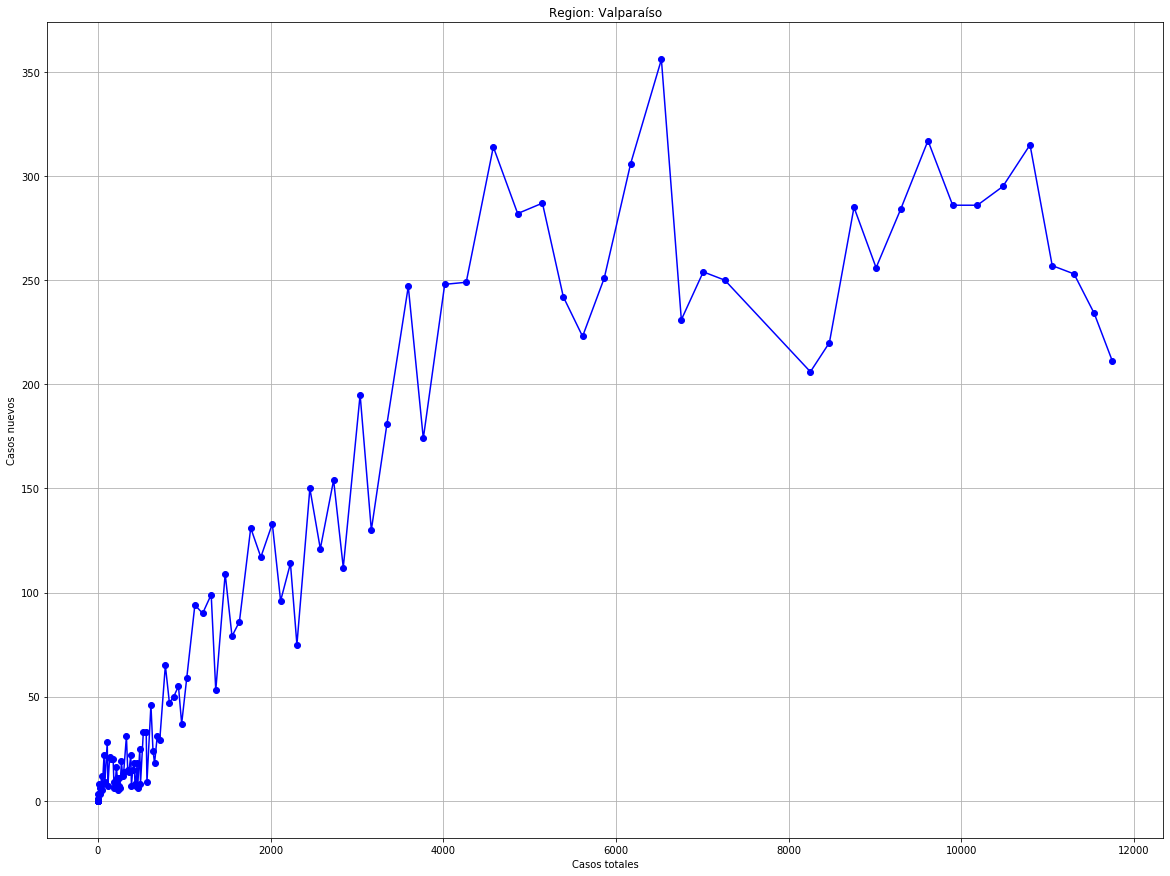

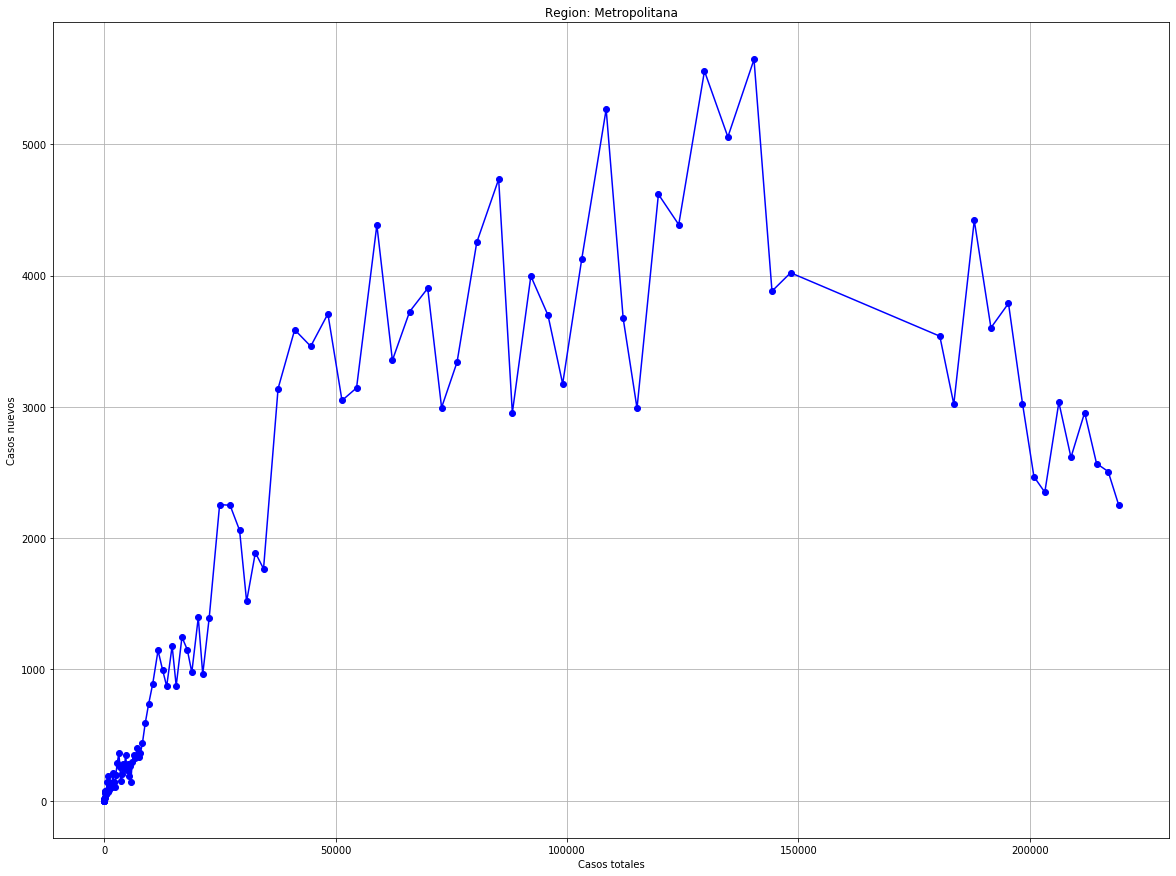

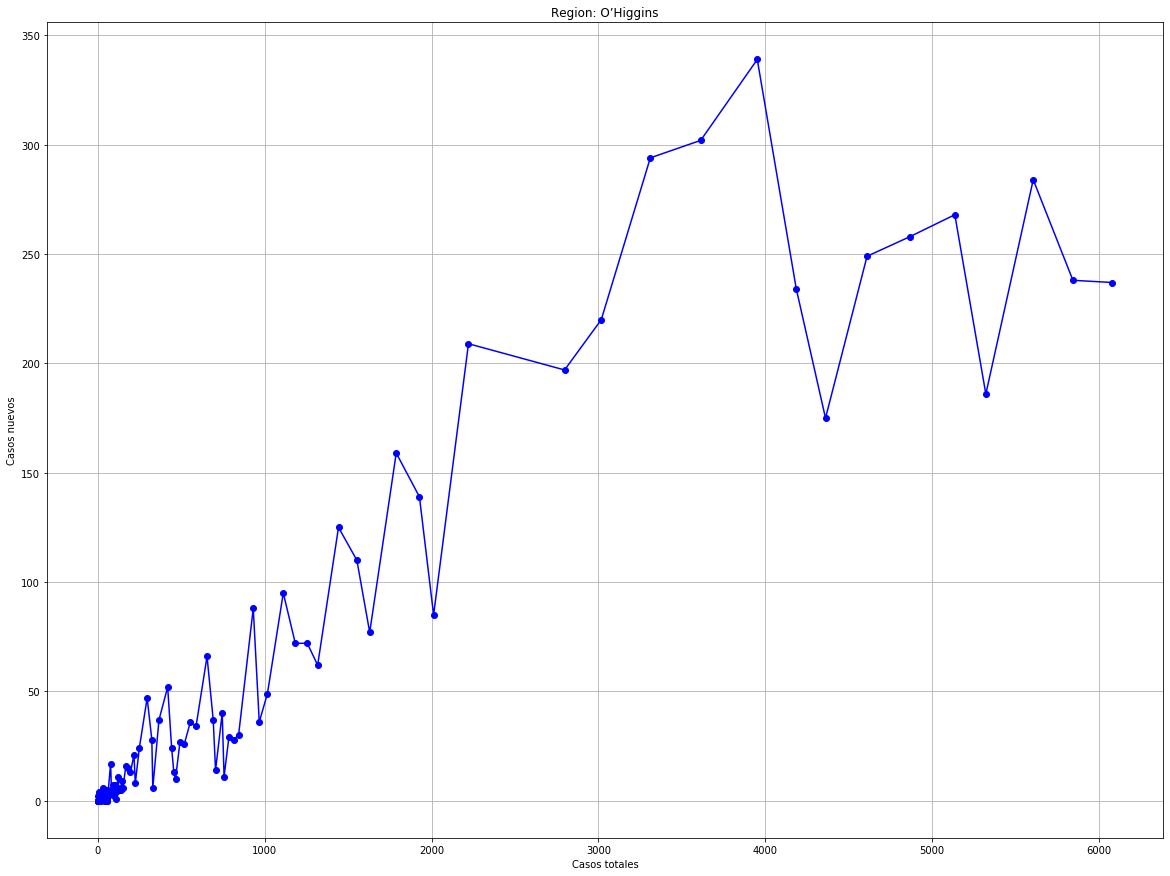

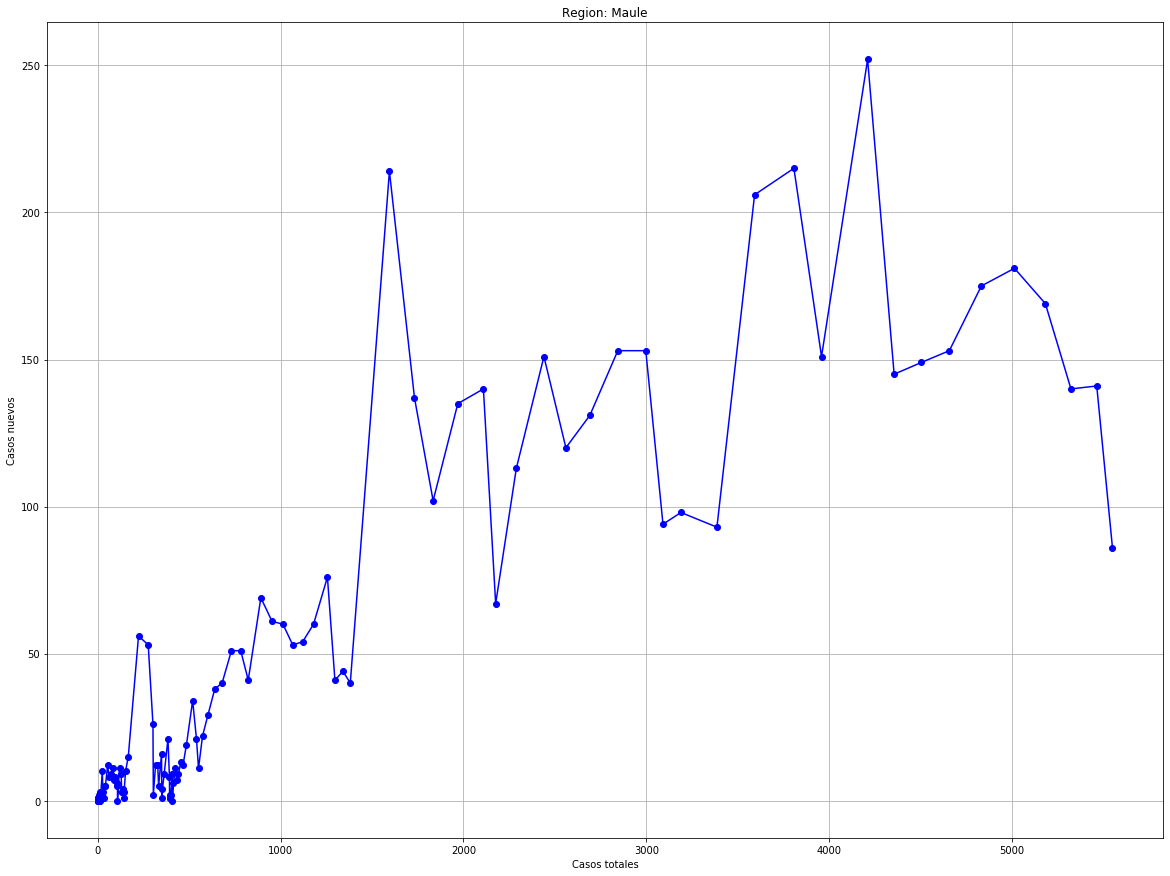

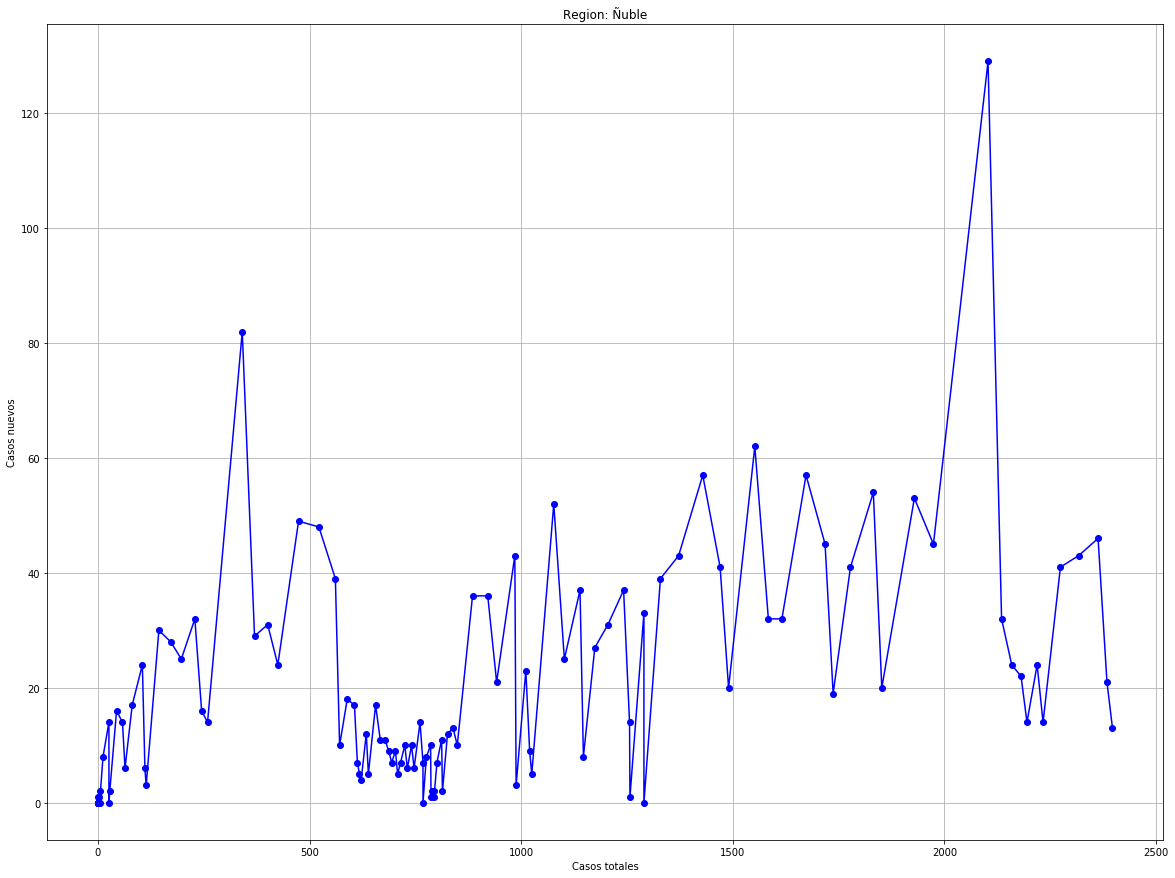

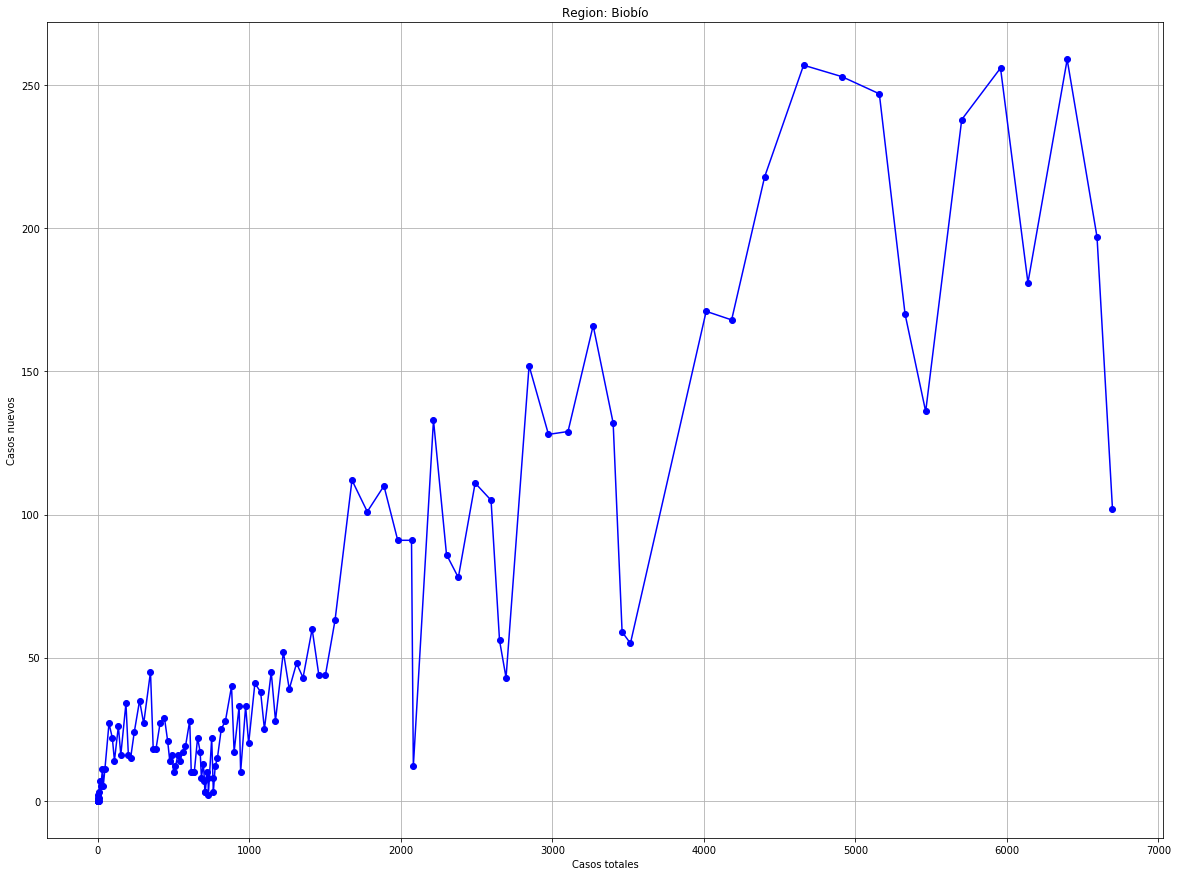

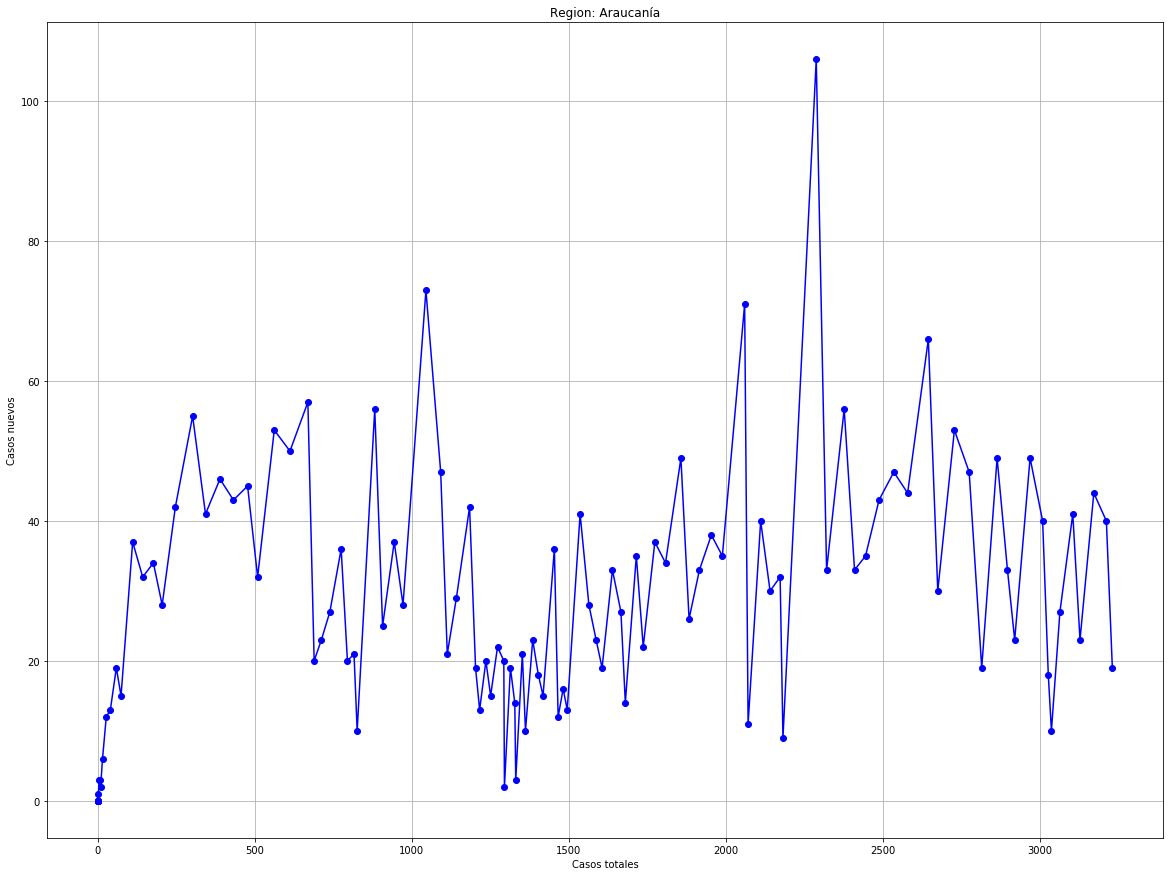

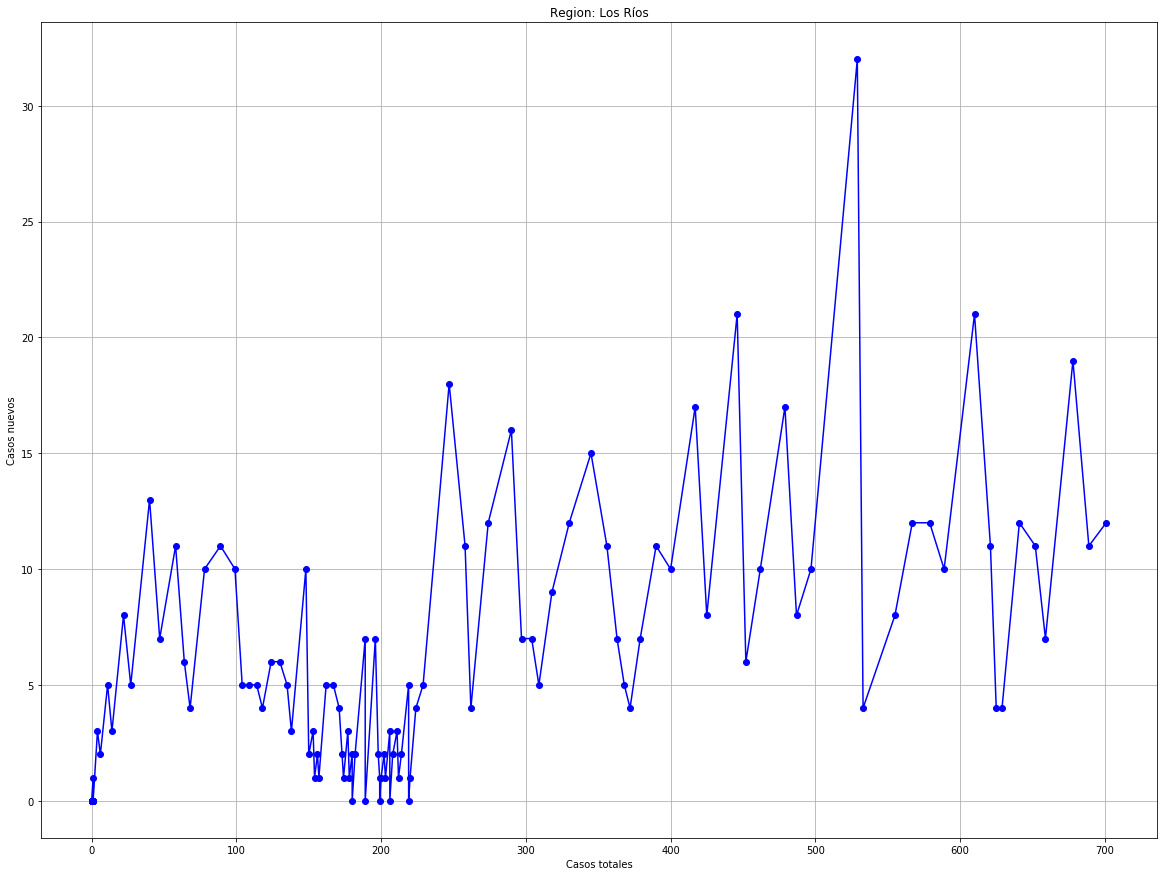

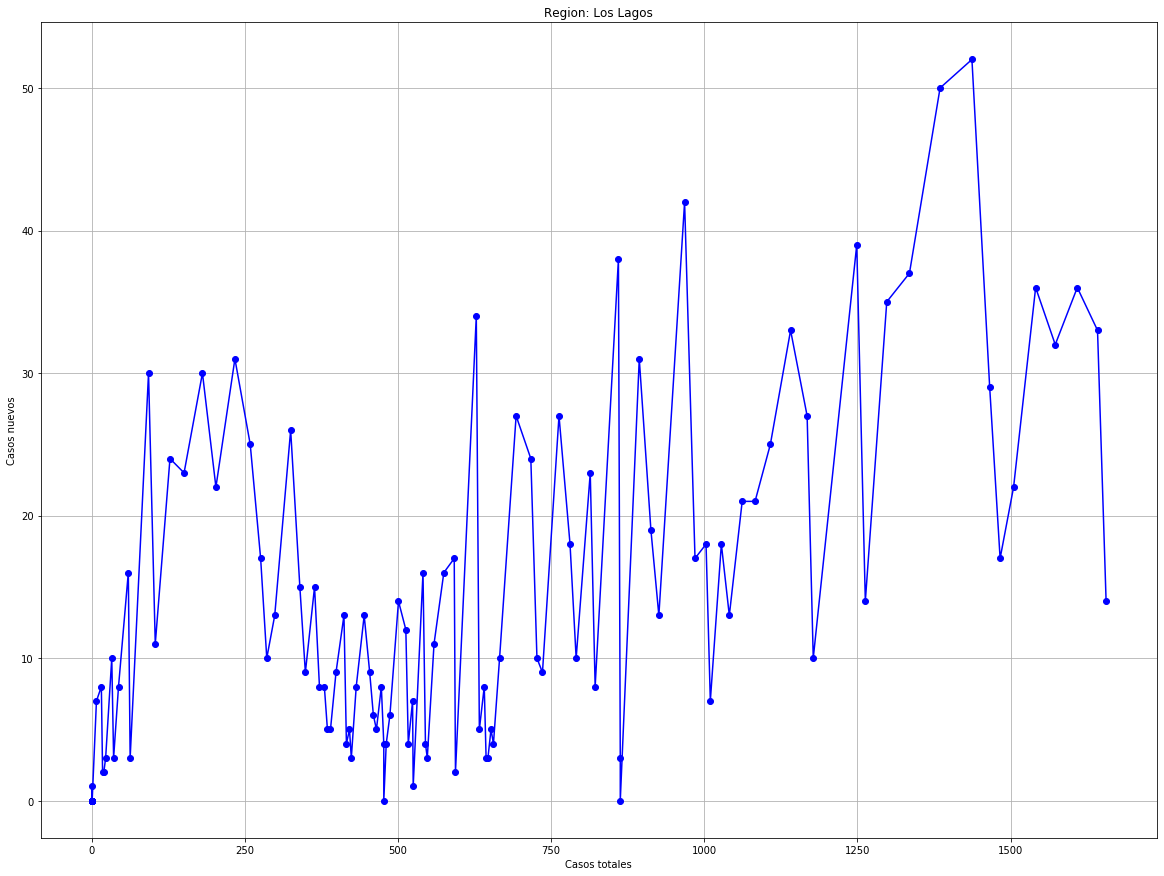

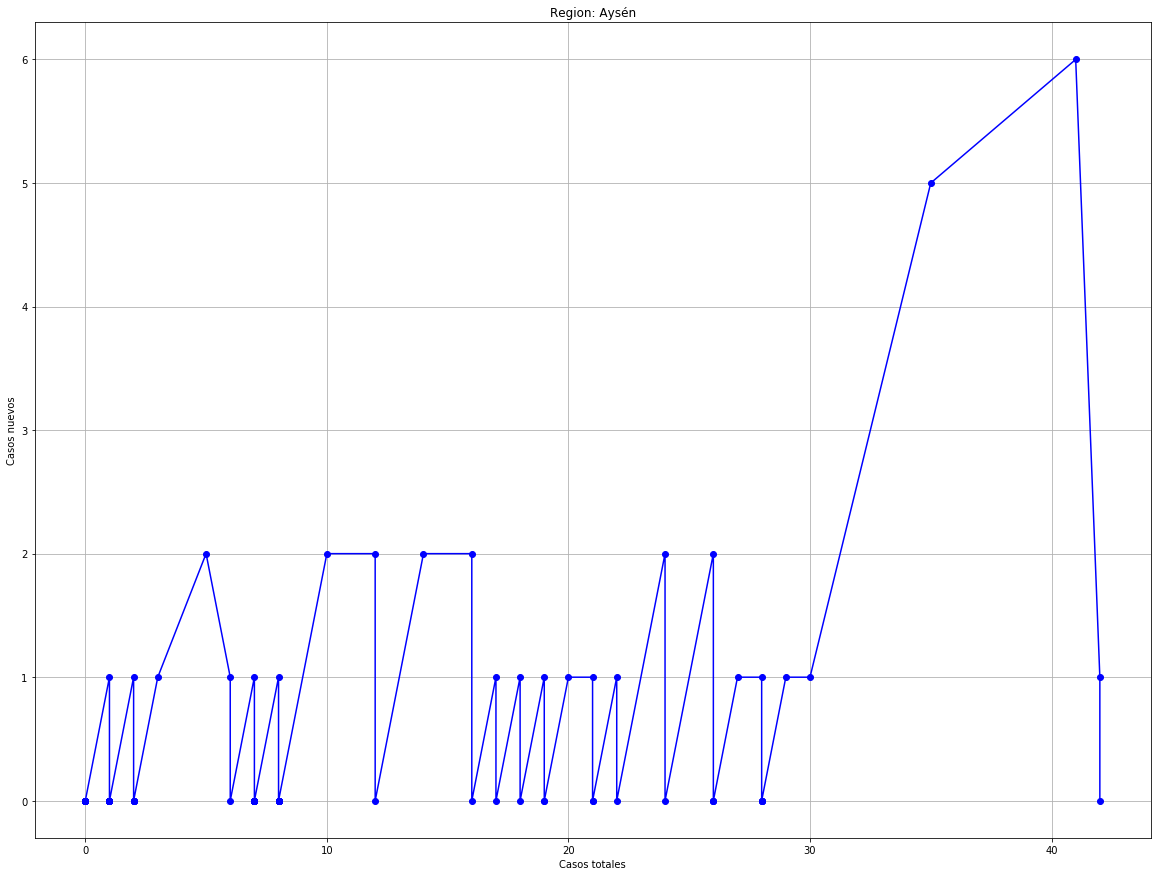

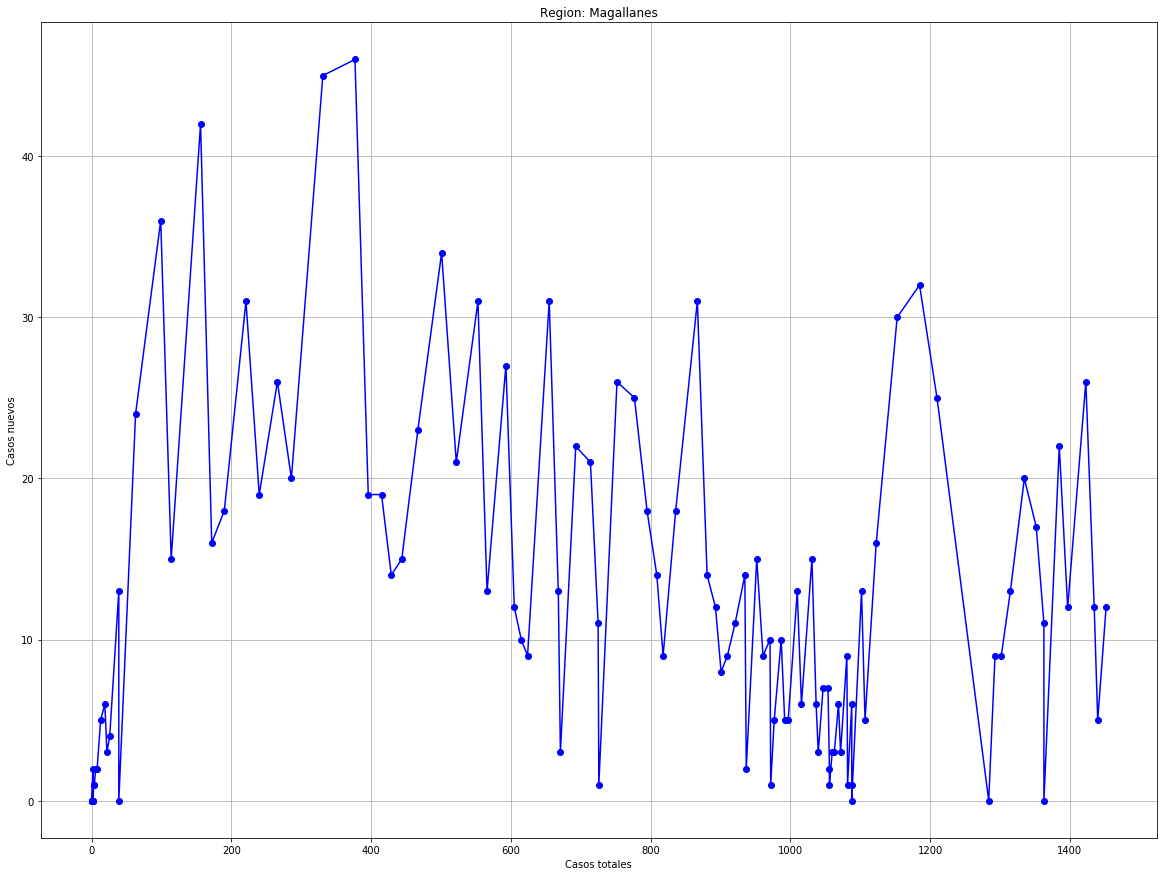

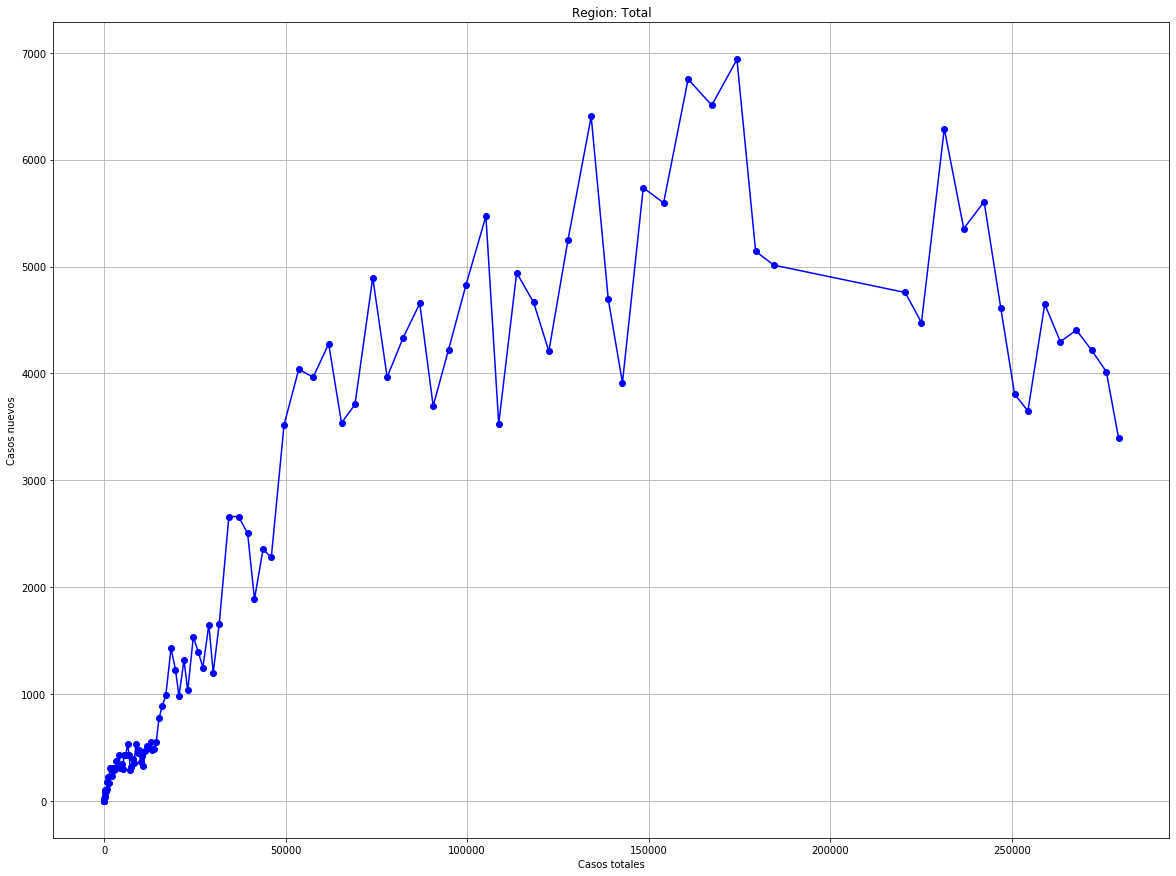

In [5]:
regiones = data_acumulados.columns[1:]
for region in regiones:
    graph(region)

In [6]:
interact(graph,
         region = regiones)
None

interactive(children=(Dropdown(description='region', options=('Arica y Parinacota', 'Tarapacá', 'Antofagasta',…

## Nuevos contagios por días

In [7]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom',
            size = '15')
        
def graph_for_days(region):
    fechas        = data_nuevos["Fecha"].values.tolist()
    casos_nuevos  = data_nuevos[region].values.tolist()
    casos_totales = data_acumulados[region].values.tolist()
    
    plt.figure(figsize=(20,15))
    plt.plot(fechas, casos_nuevos, 'bo-')
    plt.title("Region: " + region)
    plt.grid()
    plt.xlabel('Fecha')
    plt.ylabel('Casos nuevos')
    labelonbars(fechas, casos_nuevos)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xticks(fechas, rotation='vertical')
    plt.show()

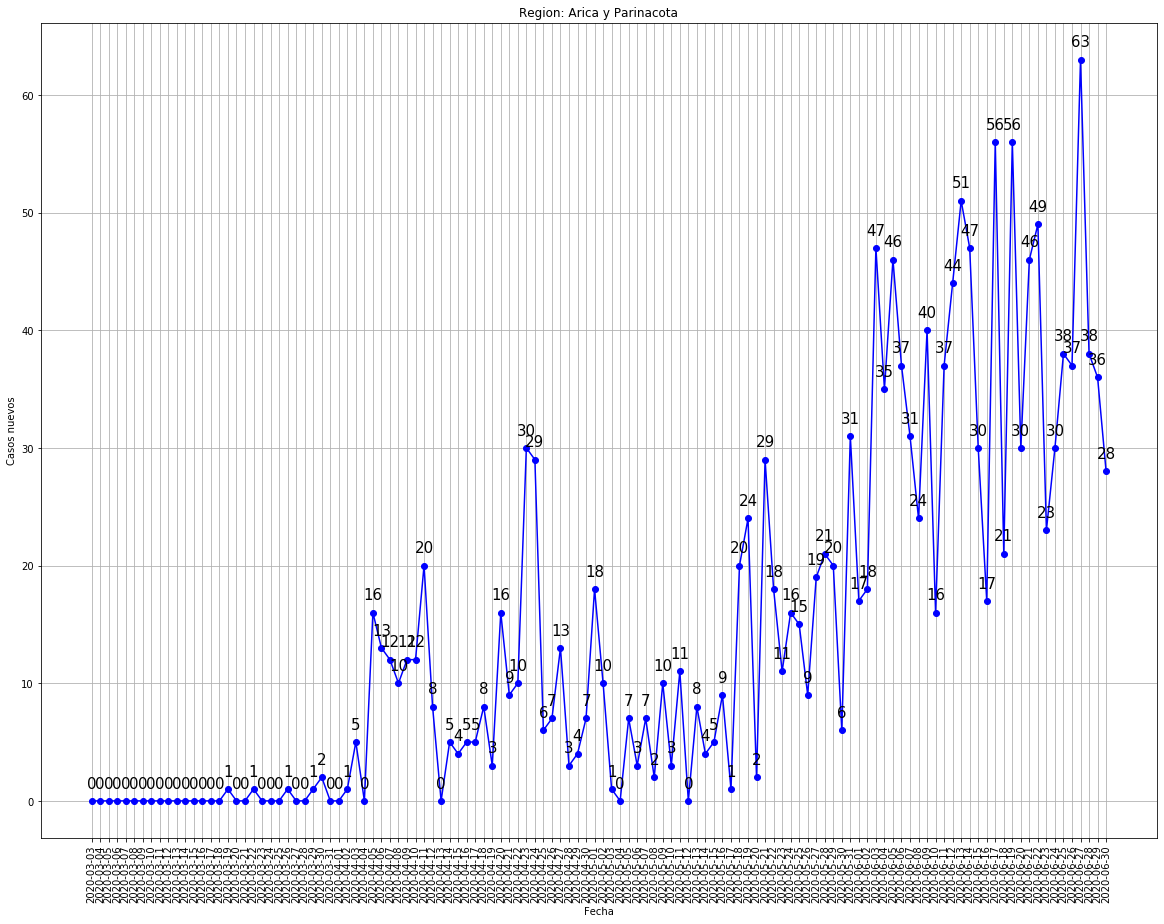

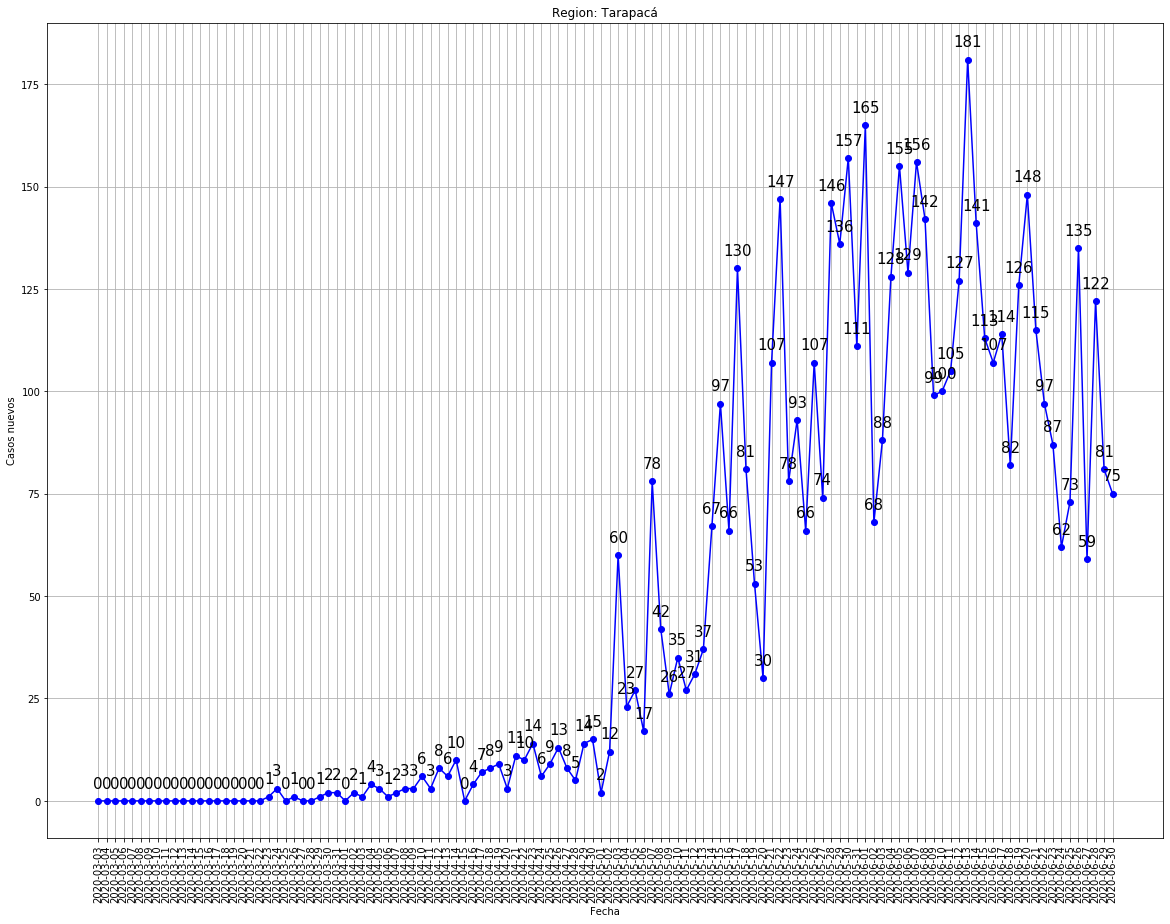

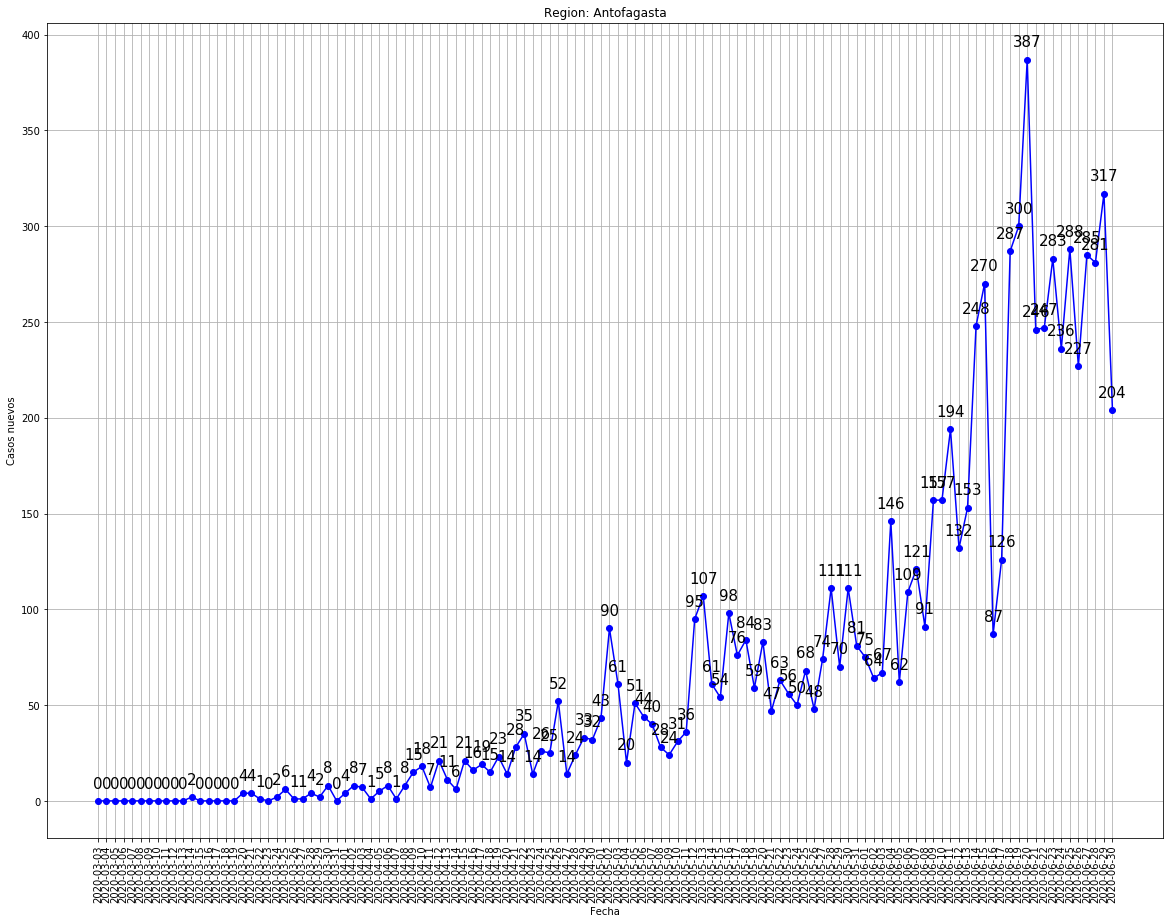

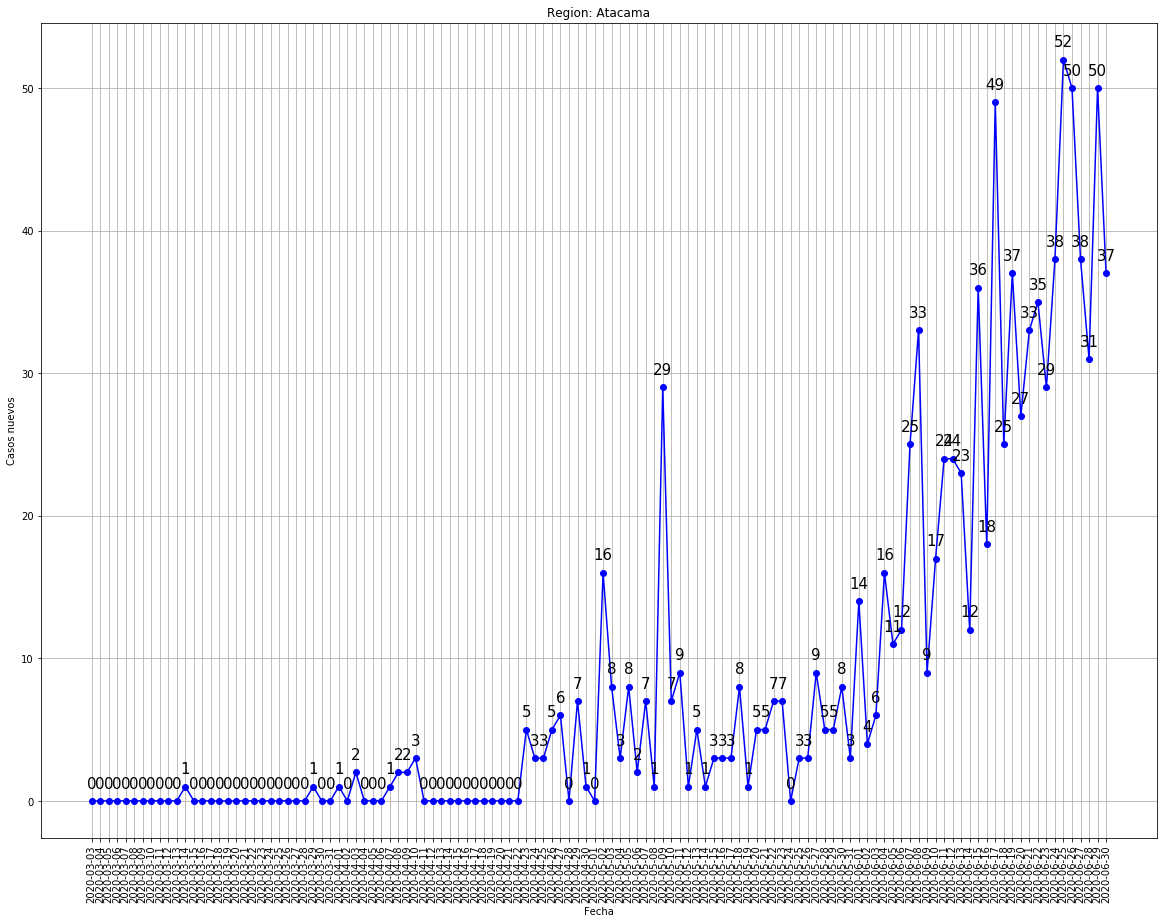

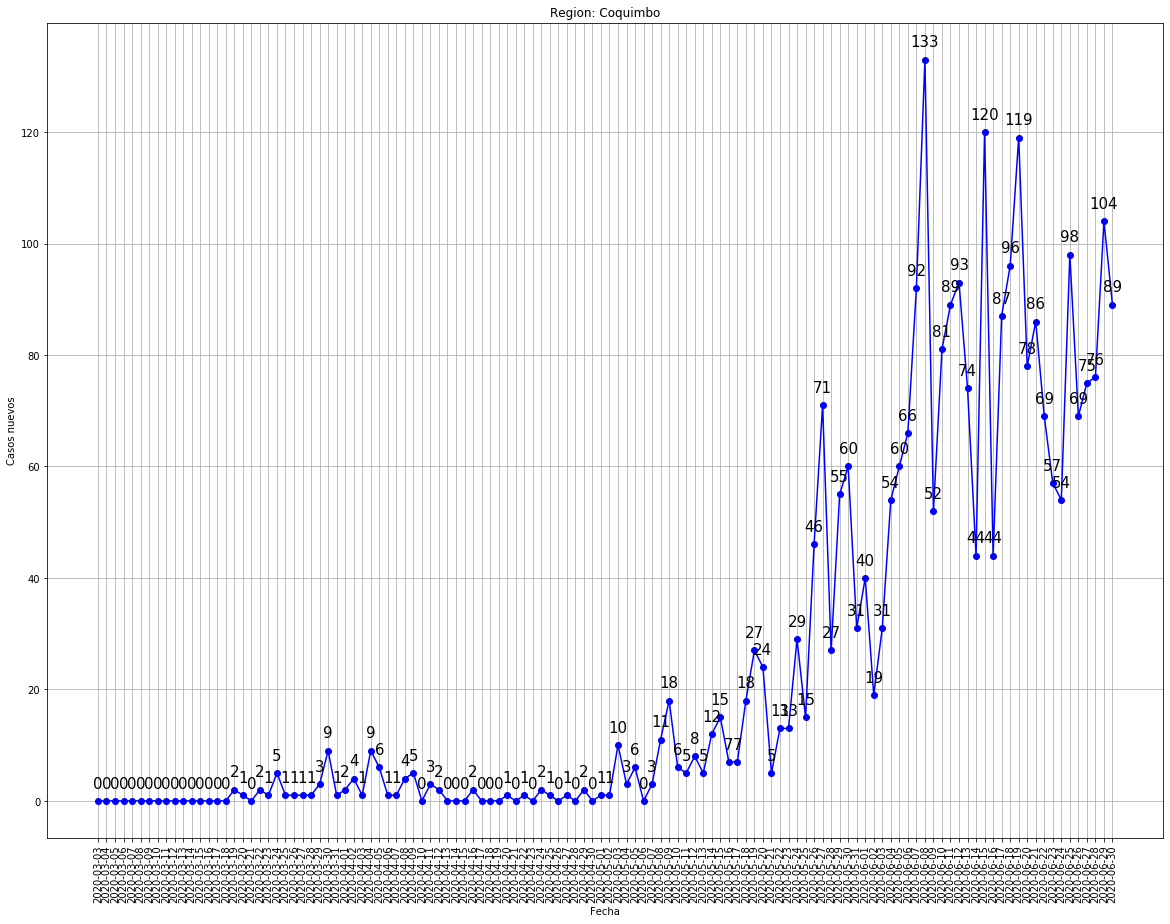

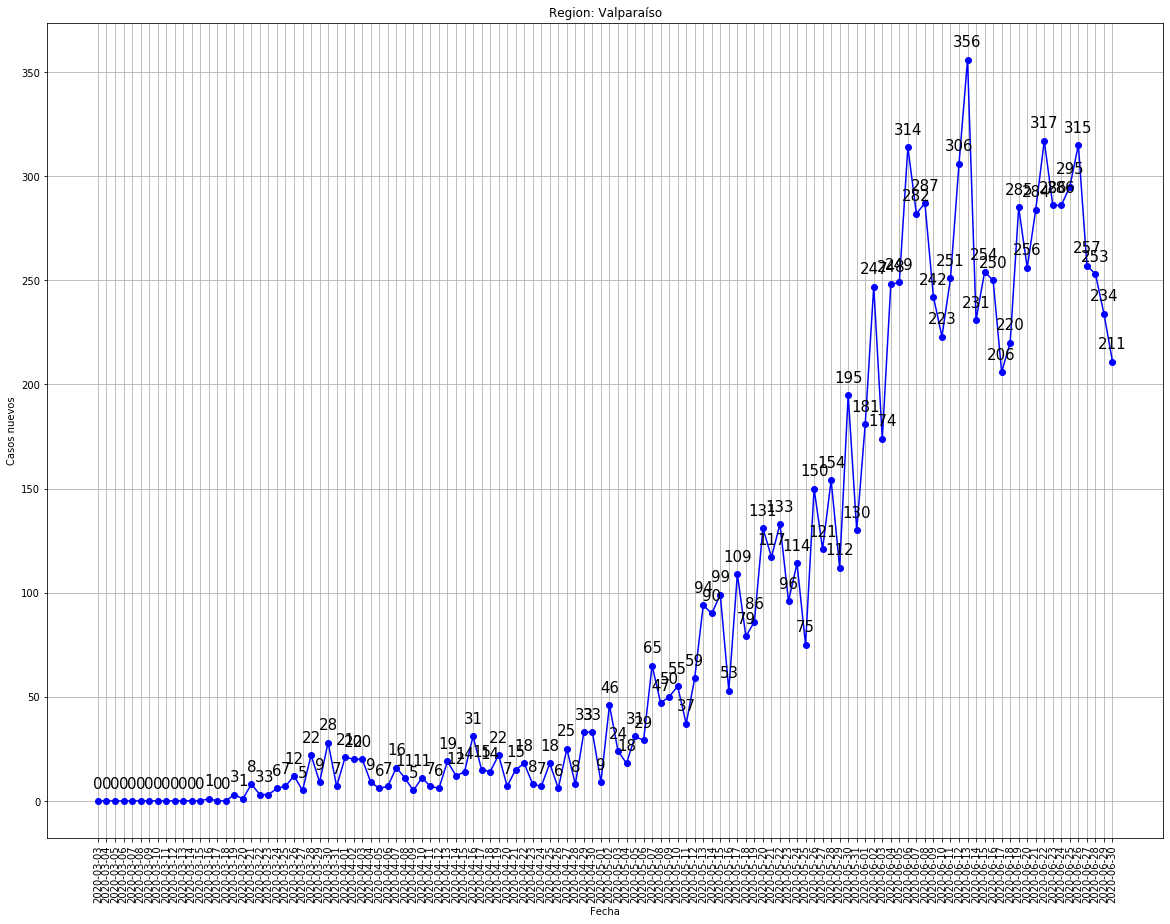

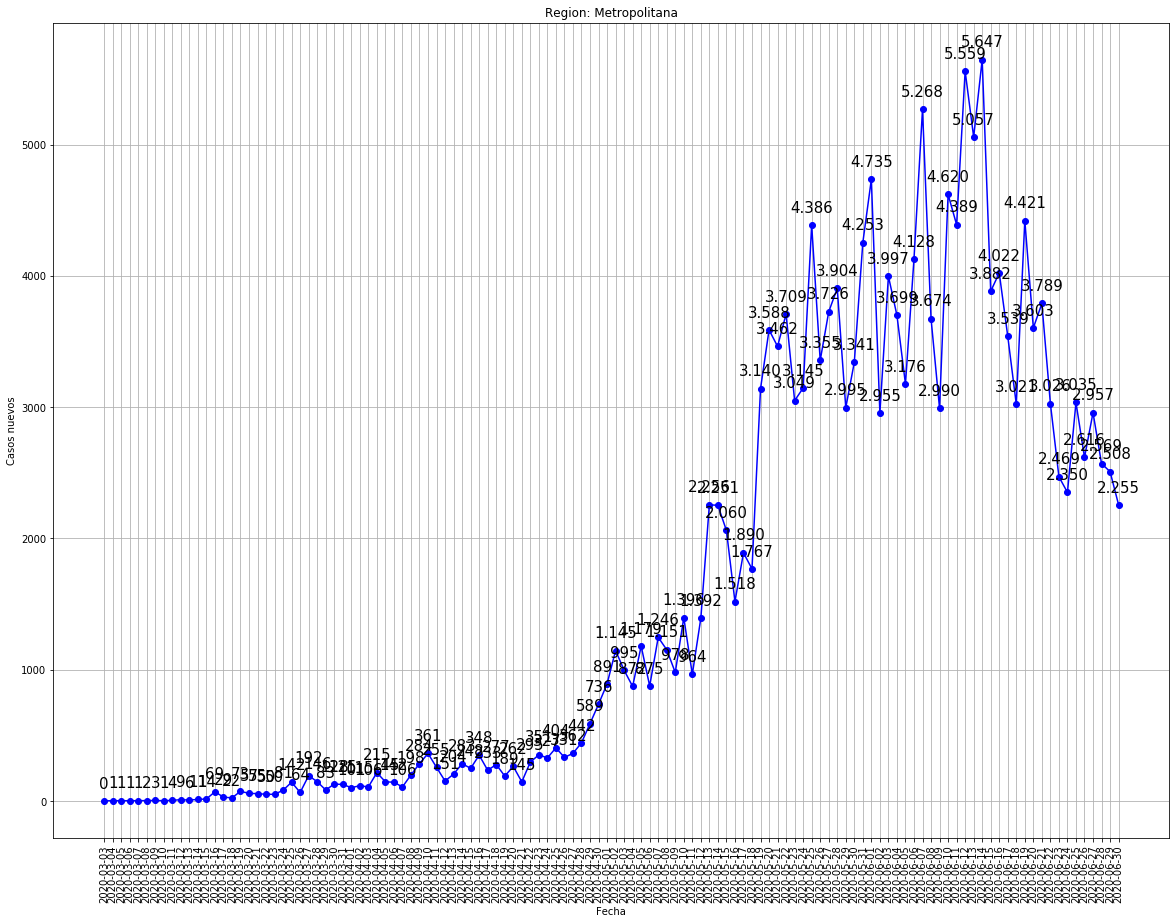

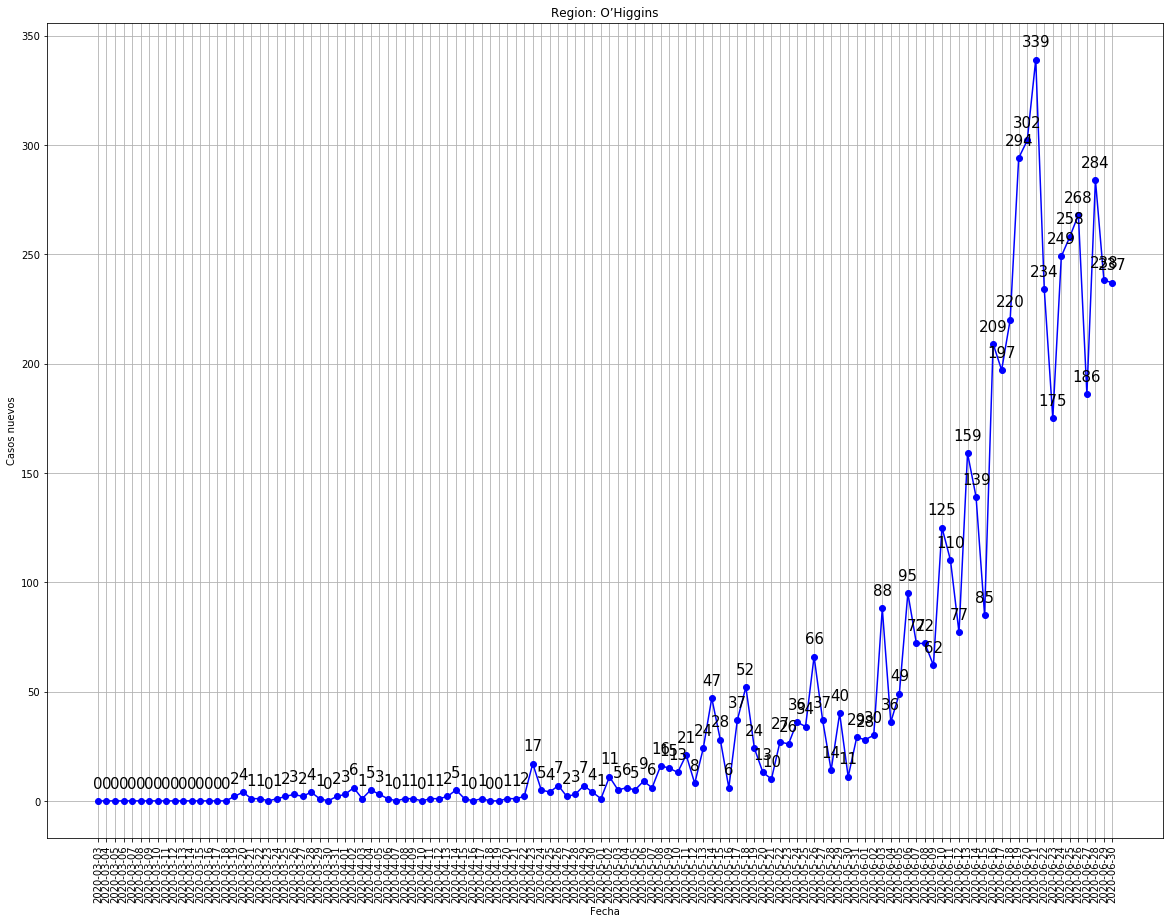

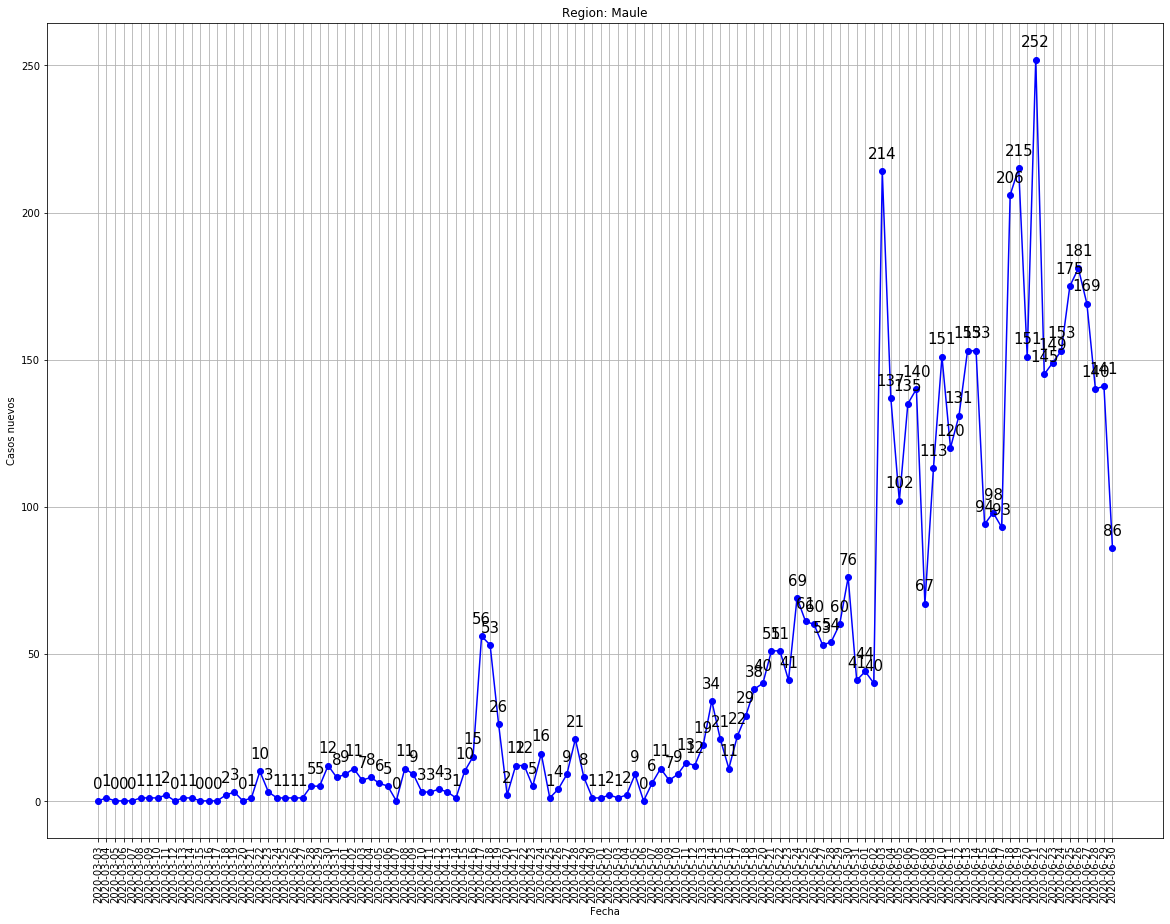

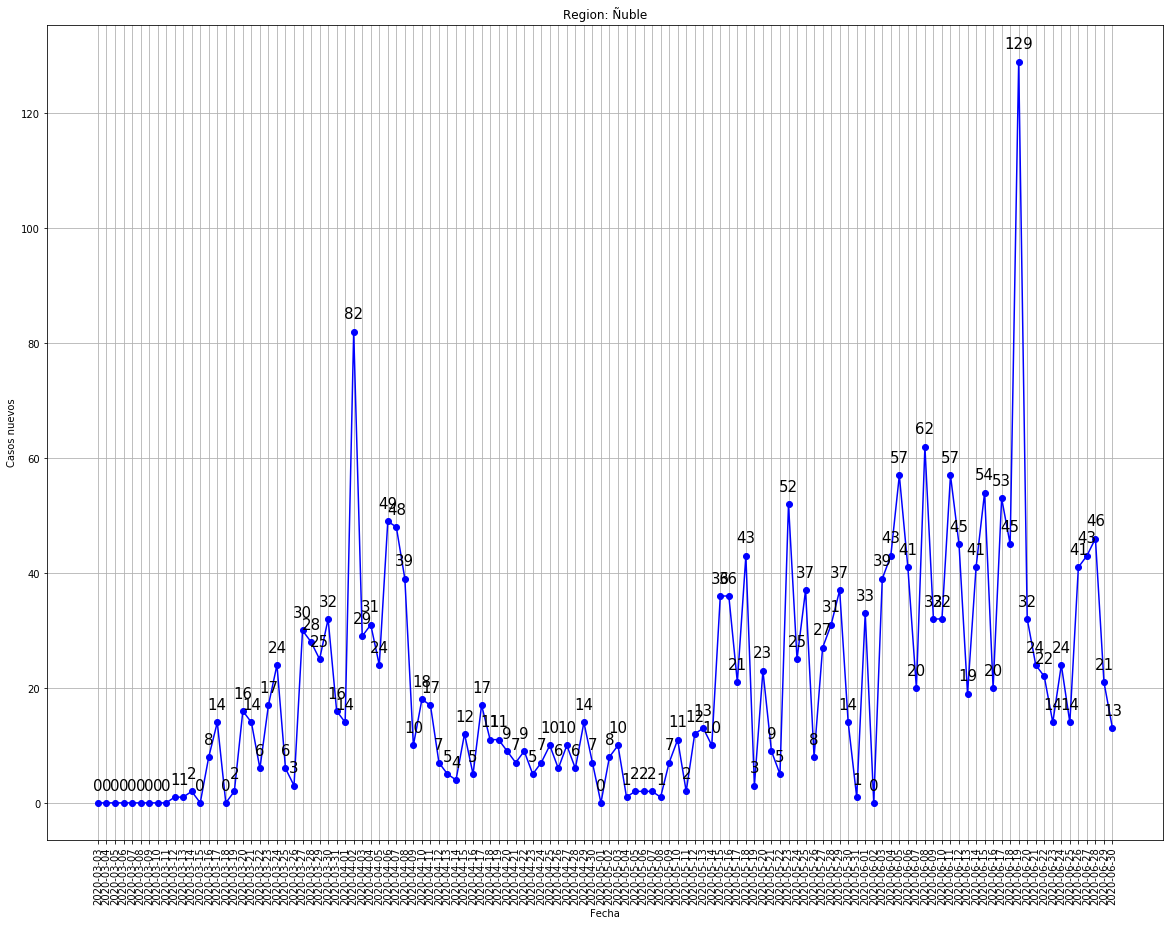

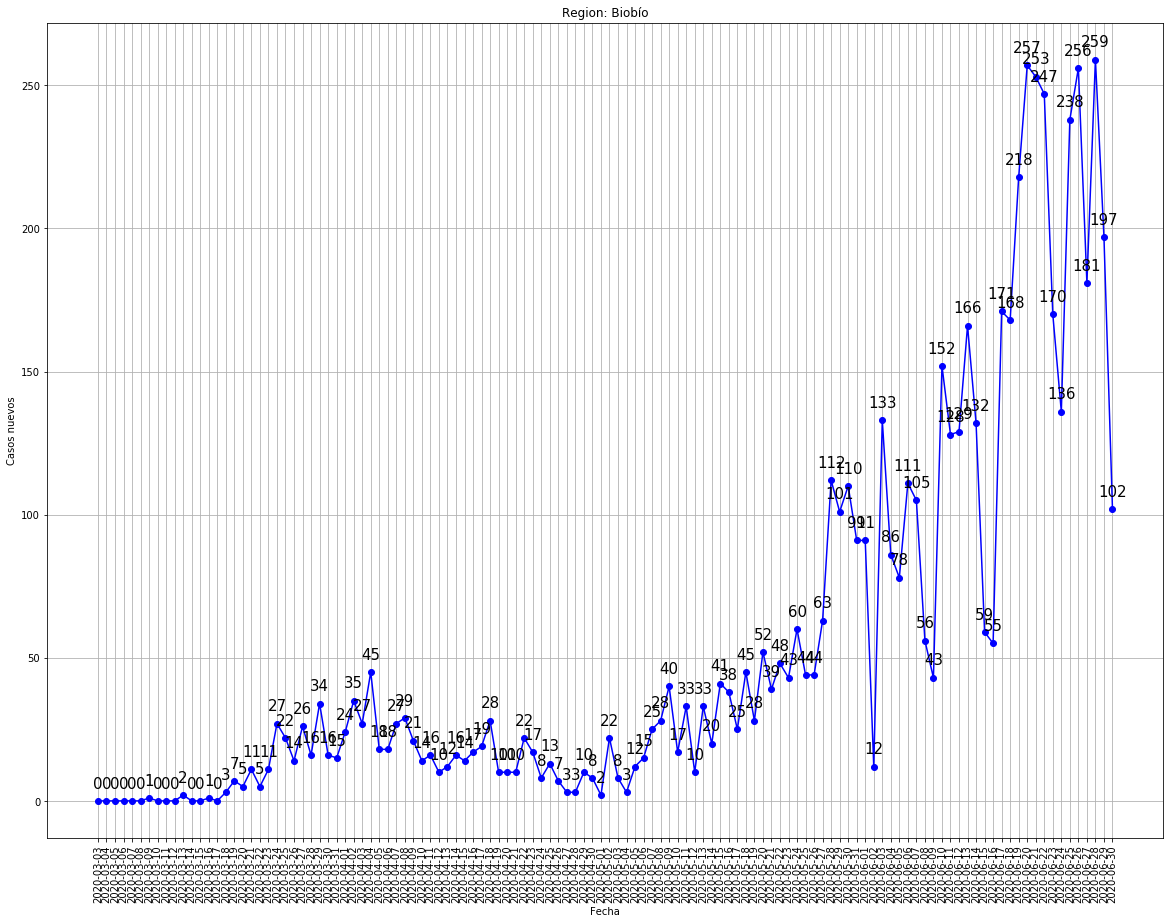

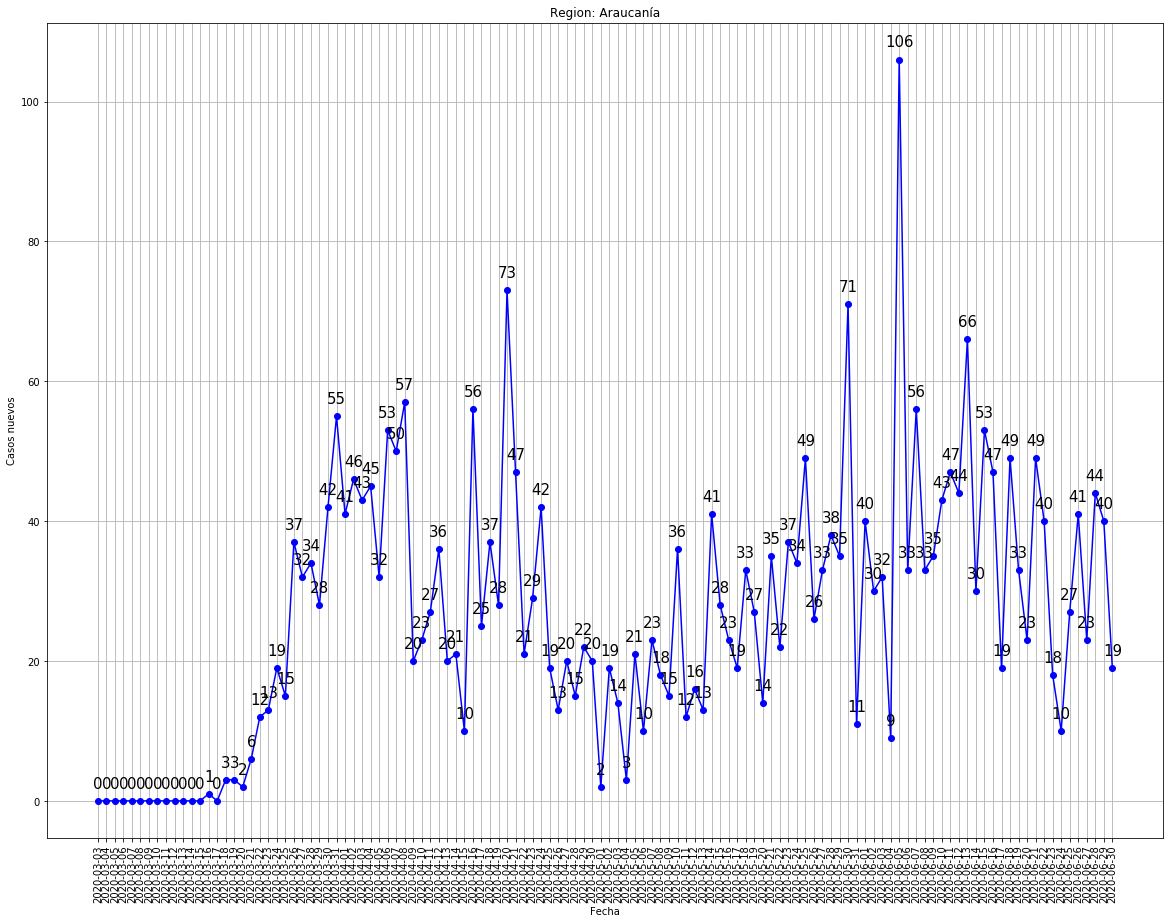

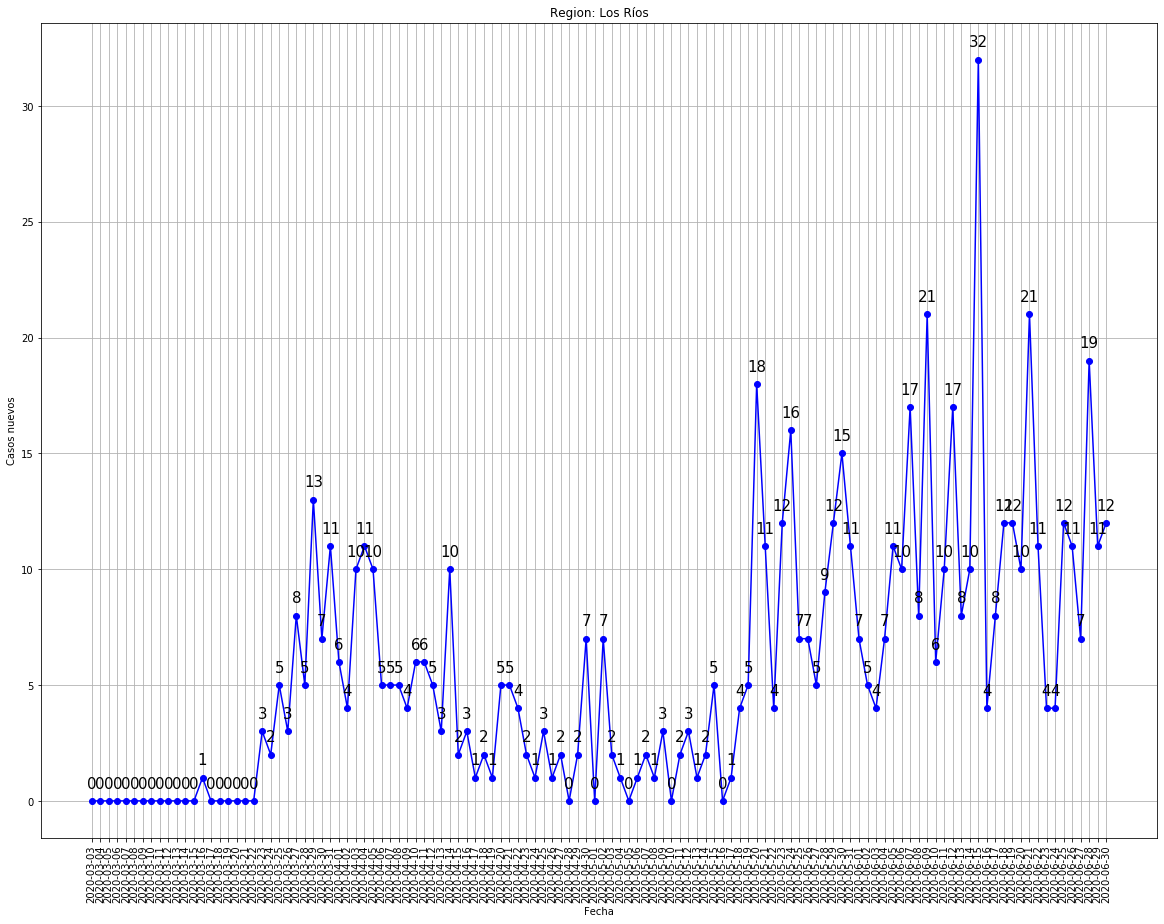

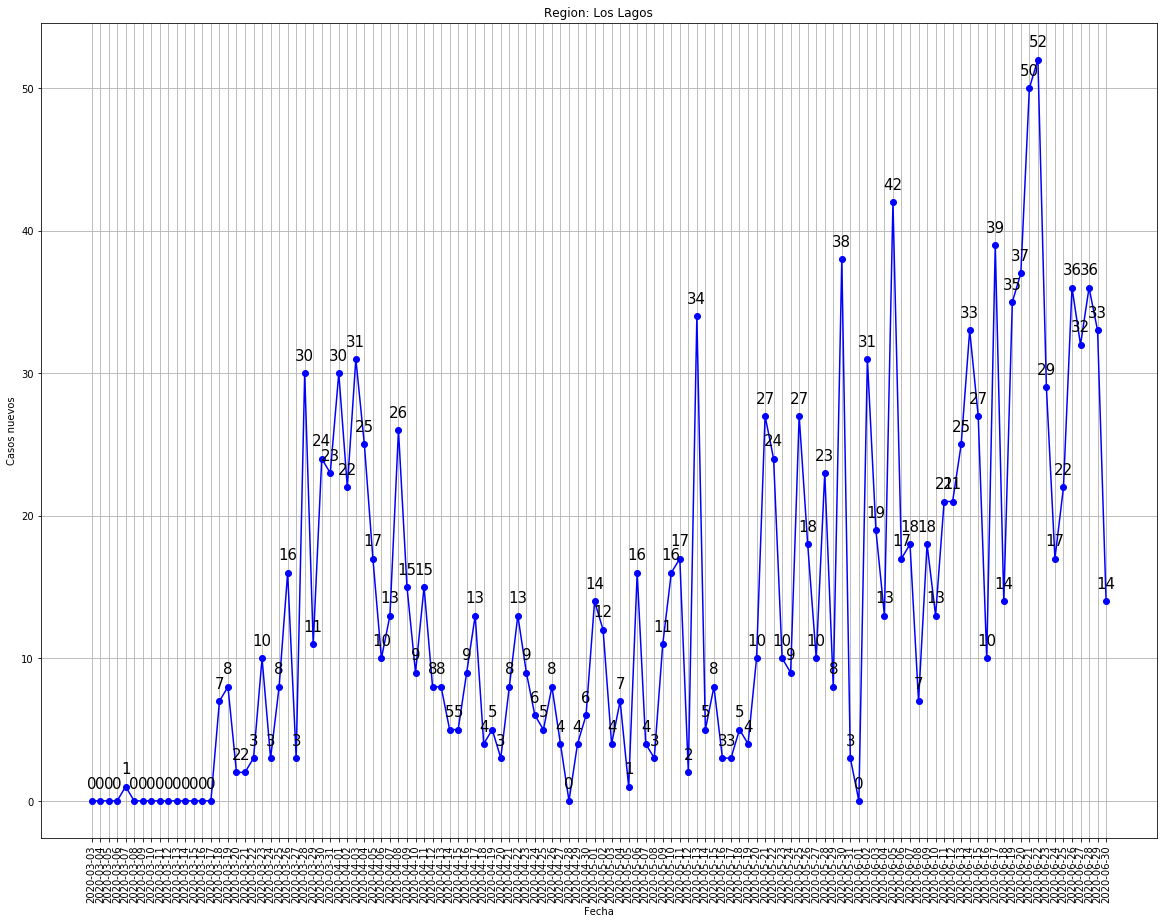

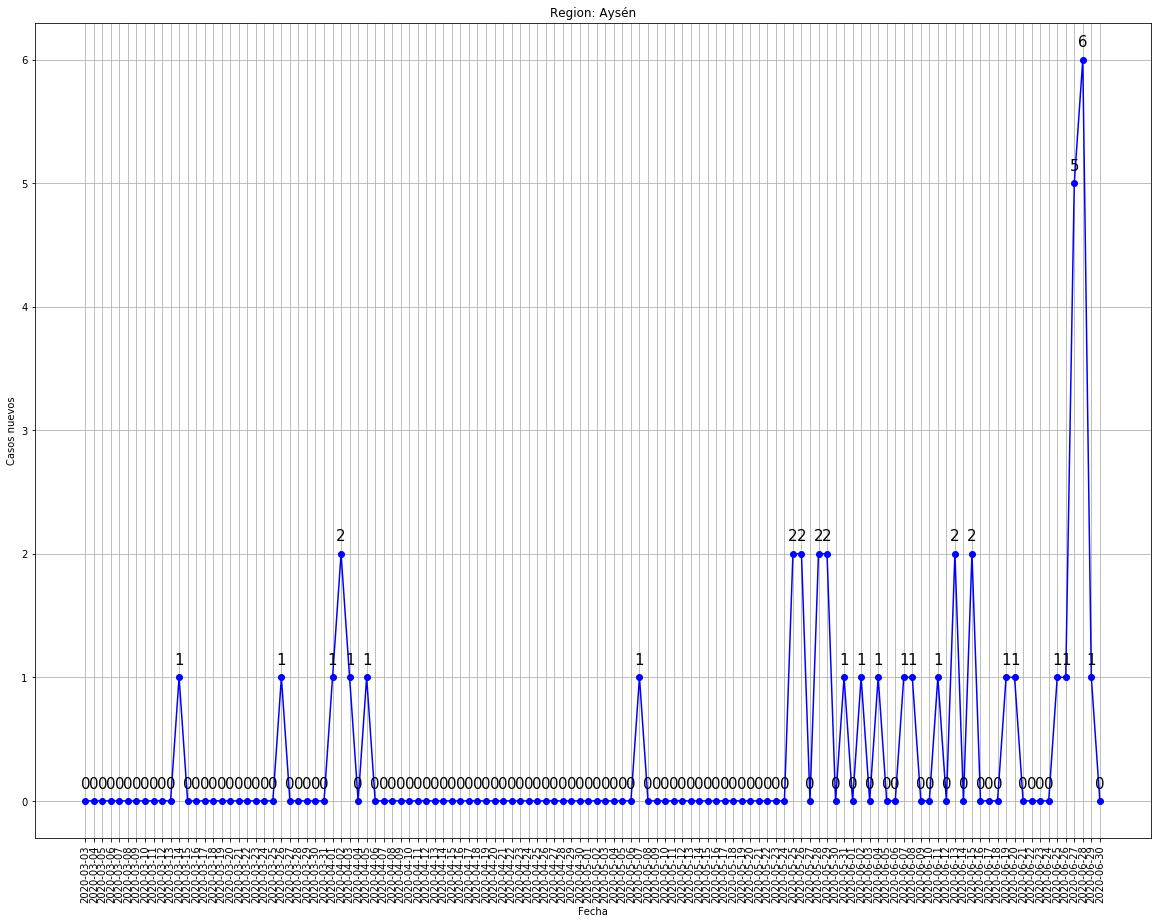

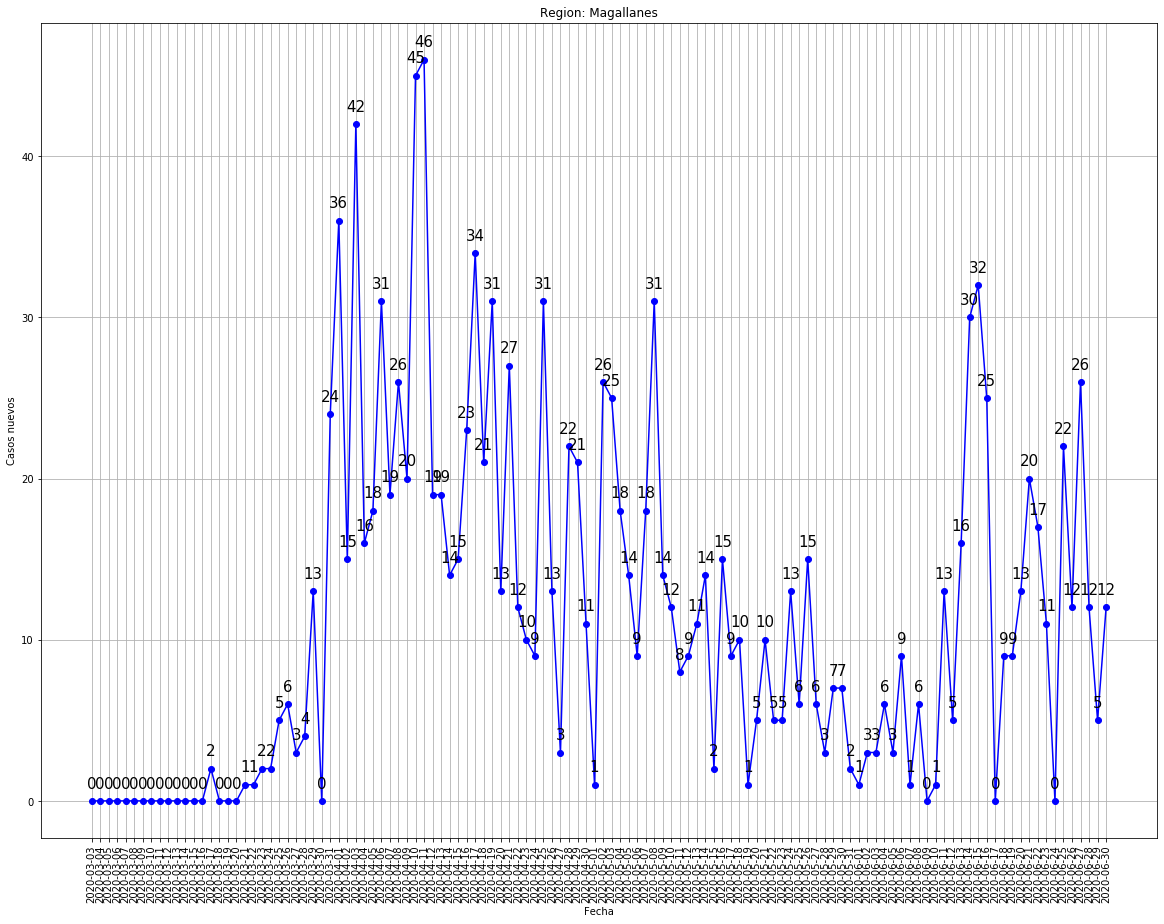

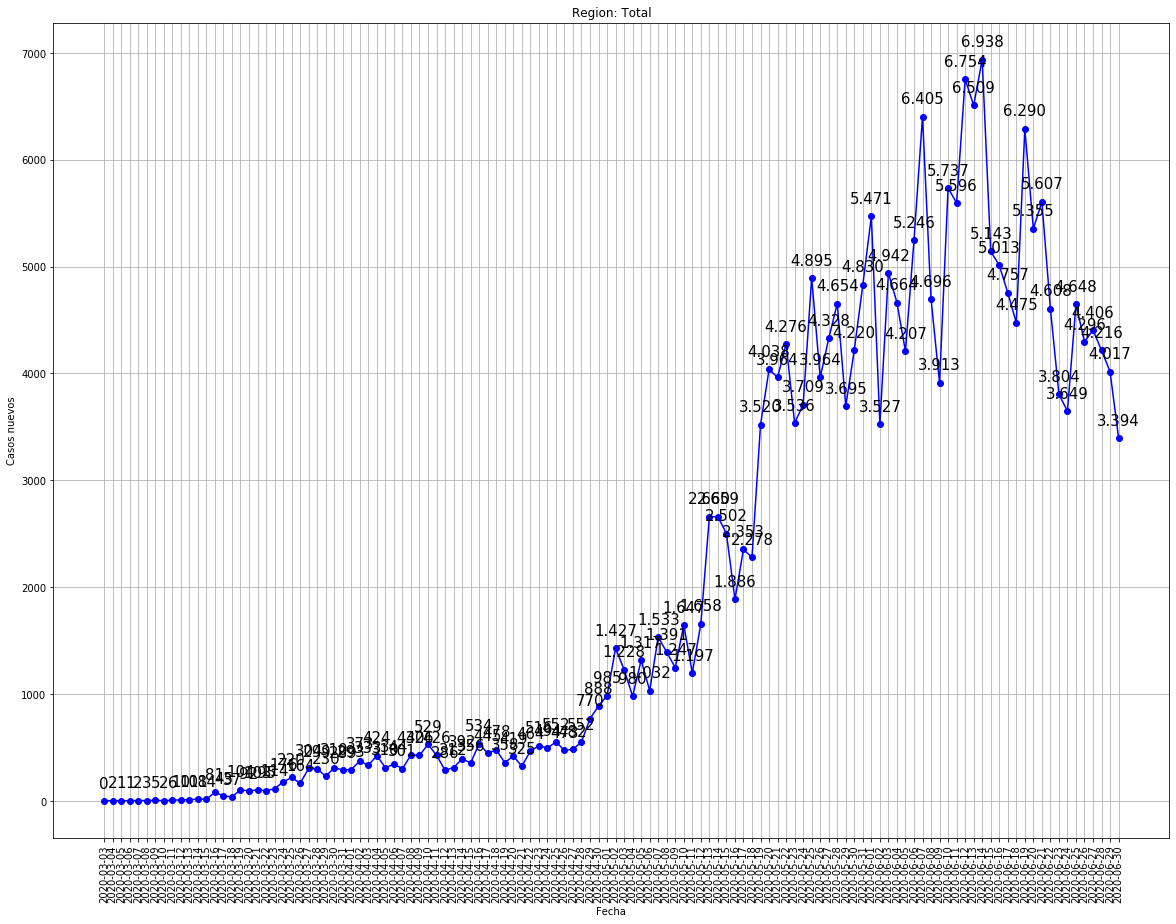

In [8]:
regiones = data_acumulados.columns[1:]
for region in regiones:
    graph_for_days(region)

In [9]:
interact(graph_for_days,
         region = regiones)
None

interactive(children=(Dropdown(description='region', options=('Arica y Parinacota', 'Tarapacá', 'Antofagasta',…